<a href="https://colab.research.google.com/github/MaxSivo/Space-Mission-Analysis/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

In [3]:
%pip install --upgrade plotly

      Successfully uninstalled plotly-5.5.0


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

### Preliminary Data Exploration


In [ ]:
df_data.shape

In [ ]:
df_data.columns

In [ ]:
df_data.isna().any()

In [ ]:
df_data.duplicated().any()

## Data Cleaning - Check for Missing Values and Duplicates

In [11]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [12]:
df_clean = df_data.dropna()

In [ ]:
df_clean.shape

## Descriptive Statistics

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

A logarithmic bar chart that shows the number of space mission launches by organisation.

In [15]:
df_orgs = df_data.Organisation.value_counts()

In [16]:
bar = px.bar(df_orgs, x=df_orgs.index, y=df_orgs.values, log_y=True, 
             title='Number of Splace Flights by Org',)
bar.update_layout(xaxis_title='Organisation', yaxis_title='Number of Flights')
bar.update_traces(marker_color='salmon')
bar.update_xaxes(tickangle=45)
bar.show()

# Number of Active versus Retired Rockets

The number of rockets that are active compared to those that are decomissioned.

In [17]:
status_df = df_data.Rocket_Status.value_counts()

In [18]:
bar = px.bar(x=status_df.index, y=status_df.values, title='Active vs Decomissioned Rockets',
             color=status_df.index,
             color_discrete_map={'StatusRetired':'crimson',
                                 'StatusActive':'royalblue'})
bar.update_layout(xaxis_title='', yaxis_title='Count')
bar.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
success_df = df_data.Mission_Status.value_counts()
success_df

In [20]:
bar = px.bar(x=success_df.index, y=success_df.values, title='Mission Status',
             log_y=True,
             color=success_df.index,
             color_discrete_map={'Failure':'firebrick',
                                 'Success':'limegreen',
                                 'Partial Failure': 'orange',
                                 'Prelaunch Failure':'black'})
bar.update_layout(xaxis_title='', yaxis_title='Count')

bar.show()

# Histogram to Show the Distribution of Prices per Launch

What the average launch cost looks like


In [ ]:
df_clean.Price = df_clean.Price.str.replace(',','')
df_clean.Price = pd.to_numeric(df_clean.Price)

In [ ]:
df_clean[df_clean.Price == df_clean.Price.max()]

In [31]:
df_clean.Price.mean()

153.7921991701245

In [24]:
hist = px.histogram(x=df_clean.Price, title='Distribution of Prices per Spacecraft',
                    log_x=False)
hist.update_layout(xaxis_title='Price in $Millions', yaxis_title='Count')
hist.update_traces(marker_color='fuchsia')


hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

[Plotly documentation](https://plotly.com/python/choropleth-maps/)

The iso3166 package is used to convert the country names to Alpha3 format.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


In [ ]:
country_df = df_data.Location.str.rsplit(',', n=1, expand=True)
country_df['Country'] = country_df[1]

# There is a space before "USA" making the line below necessary

country_df['Country'] = country_df.Country.str.replace(' ', '')
country_df

In [26]:
country_df.Country.replace('NewZealand', 'New Zealand', inplace=True)
country_df.Country.replace('Russia', 'Russian Federation', inplace=True)
country_df.Country.replace('YellowSea', 'China', inplace=True)
country_df.Country.replace('PacificMissileRangeFacility', 'USA', inplace=True)
country_df.Country.replace('GranCanaria', 'USA', inplace=True)
country_df.Country.replace('ShahrudMissileTestSite', 'Iran, Islamic Republic of', inplace=True)
country_df.Country.replace('Iran', 'Iran, Islamic Republic of', inplace=True)
country_df.Country.replace('NewMexico', 'USA', inplace=True)
country_df.Country.replace("NorthKorea", "Korea, Democratic People's Republic of", inplace=True)
country_df.Country.replace('PacificOcean', 'USA', inplace=True)
country_df.Country.replace('SouthKorea', 'Korea, Republic of', inplace=True)
country_df.Country.replace('BarentsSea', 'Russian Federation', inplace=True)

In [27]:
#Using the ISO package to extract country codes

iso = []
for c in country_df.Country:
  iso.append(countries.get(c)[2])
  
country_df['ISO'] = iso

In [ ]:
launches_df = country_df.groupby(['Country', 'ISO'], as_index=False).agg({1: pd.Series.count})
launches_df.rename(columns={1:'Launches'}, inplace=True)

launches_df

In [29]:
world_map = px.choropleth(launches_df,
                          locations='ISO',
                          color='Launches', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Launches Per Country")
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [33]:
# df_data = df_data.join(country_df.ISO)
# df_data = df_data.join(country_df.Country)

df_status = df_data[df_data.Mission_Status == 'Failure']
df_status = df_status.groupby(['Country', 'ISO'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_status.rename(columns={'Mission_Status':'Failures'}, inplace=True)
df_status

,Country,ISO,Failures
0,Australia,AUS,3
1,Brazil,BRA,2
2,China,CHN,19
3,France,FRA,13
4,India,IND,8
5,"Iran, Islamic Republic of",IRN,8
6,Israel,ISR,2
7,Japan,JPN,10
8,Kazakhstan,KAZ,72
9,"Korea, Democratic People's Republic of",PRK,3


In [34]:
world_map = px.choropleth(df_status,
                          locations='ISO',
                          color='Failures', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Launch Failures Per Country")
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

#Show Percent Failure by Country

In [ ]:
launches_df

In [36]:
# new_row = pd.DataFrame({'Country':'Kenya', 'ISO': 'KEN', 'Failures':0}, index=[9])
# df_status = pd.concat([df_status.iloc[:9], new_row, df_status.iloc[9:]]).reset_index(drop=True)
error here so I can uncomment

# df_status

In [37]:
df_status['Successes'] = launches_df['Launches'] - df_status['Failures']
df_status['Total_Launches'] = launches_df['Launches']
df_status['Success_Rate'] = df_status['Successes']/df_status['Total_Launches']
df_status = df_status.sort_values('Success_Rate', ascending=False)
df_status

,Country,ISO,Failures,Successes,Total_Launches,Success_Rate
9,Kenya,KEN,0,9,9,1.00
3,France,FRA,13,290,303,0.96
13,Russian Federation,RUS,63,1335,1398,0.95
2,China,CHN,19,250,269,0.93
7,Japan,JPN,10,116,126,0.92
14,USA,USA,132,1255,1387,0.90
8,Kazakhstan,KAZ,72,629,701,0.90
4,India,IND,8,68,76,0.89
12,New Zealand,NZL,2,11,13,0.85
6,Israel,ISR,2,9,11,0.82


In [38]:
hovertemp = "<b>Total Launches: </b> %{customdata}"

bar = px.bar(x=df_status.Country, y=df_status.Success_Rate, title='Success Rate by Country',
             color=df_status.Success_Rate.round(2),
             color_continuous_scale='rdylgn',
             text=df_status.Success_Rate.round(2),
             custom_data=[df_status['Total_Launches']])
bar.update_layout(xaxis_title='Country', yaxis_title='Success Rate')
bar.update_traces(hovertemplate=hovertemp)

bar.show()

#Merging Khazakstan and Russia 
Space craft launched from Kazakhstan were technically part of the USSR at the time. Therefore it is appropriate to merge the two together at this point. Also noteworthy is that although there have been 9 launches in Kenya. Those launches were oversaw by the ISA (Italian Space Agency)

In [ ]:
df_merge = df_data
df_merge.Country.replace('Kazakhstan', 'Russian Federation', inplace=True)
df_merge.ISO.replace('KAZ', 'RUS', inplace=True)
df_merge.Country.replace('Kenya', 'Italy', inplace=True)
df_merge.ISO.replace('KEN', 'ITA', inplace=True)
df_merge.sample(1)

In [64]:
merged_countries = df_merge.groupby(['Country', 'ISO'], as_index=False).agg({'Mission_Status':pd.Series.count})
merged_countries.rename(columns={'Mission_Status':'Launches'}, inplace=True)
merged_countries

,Country,ISO,Launches
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,269
3,France,FRA,303
4,India,IND,76
5,"Iran, Islamic Republic of",IRN,14
6,Israel,ISR,11
7,Italy,ITA,9
8,Japan,JPN,126
9,"Korea, Democratic People's Republic of",PRK,5


In [ ]:
merged_failures = df_merge[df_merge.Mission_Status == 'Failure']
merged_failures = merged_failures.groupby(['Country', 'ISO'], as_index=False).agg({'Mission_Status': pd.Series.count})
merged_failures.rename(columns={'Mission_Status':'Failures'}, inplace=True)
merged_failures

In [ ]:
# new_row = pd.DataFrame({'Country':'Italy', 'ISO': 'ITA', 'Failures':0}, index=[7])
merged_failures = pd.concat([merged_failures.iloc[:7], new_row, merged_failures.iloc[7:]]).reset_index(drop=True)
merged_failures

In [ ]:
merged_countries['Successes'] = merged_countries.Launches - merged_failures.Failures
merged_countries['Success_Rate'] = merged_countries.Successes / merged_countries.Launches
merged_countries = merged_countries.sort_values('Success_Rate', ascending=False)
merged_countries

A new bar chart for success rate can be seen below

In [68]:
hovertemp = "<b>Total Launches: </b> %{customdata}"

bar = px.bar(x=merged_countries.Country, y=merged_countries.Success_Rate, title='Success Rate by Country',
             color=merged_countries.Success_Rate.round(2),
             color_continuous_scale='rdylgn',
             text=merged_countries.Success_Rate.round(2),
             custom_data=[merged_countries['Launches']])
bar.update_layout(xaxis_title='Country', yaxis_title='Success Rate')
bar.update_traces(hovertemplate=hovertemp)

bar.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

###Sunburst chart with merged country data

As we can see the RVSN USSR was quite prolific. I also modified the chart so we can visualize which organisations had the highest success rates. 

In [ ]:
burst = px.sunburst(df_merge, 
                    path=['Country', 'Organisation', 'Mission_Status'],
                    title='Mission Status by Org',
                   )
burst.update_traces(textinfo="label+percent parent")

burst.show()

# Total Amount of Money Spent by Organisation on Space Missions

Not all organisations in the original dataset are represented as some companies do not report spending.

In [55]:
df_cost = df_clean.groupby('Organisation', as_index=False).agg({'Price':pd.Series.sum})
df_cost.sort_values('Price', ascending=False, inplace=True)
df_cost['Price'] = df_cost['Price'].multiply(1000000)

In [56]:
bar = px.bar(df_cost, x='Organisation', y='Price', log_y=True,  
             title='Total Amount Spent by Org'
             )
bar.update_layout(xaxis_title='Organisation', yaxis_title='Money spent in $')
bar.update_traces(marker_color='forestgreen')
bar.update_xaxes(tickangle=45)
bar.show()

#Amount of Money Spent by Organisation per Launch

Some of the data below is incomplete. On one hand, western and current companies such as NASA and Arianespace have reported spending on basically every mission while the prolific RVSN USSR only reported spending on two missions which happened to be the two most expensive missions in the entire dataset. With complete data, the spending of RVSN USSR on average and on aggregate would look much different.  

In [ ]:
df_cost

In [ ]:
# missions_by_org = df_clean.groupby('Organisation').agg({'Mission_Status':pd.Series.count})
# df_cost = df_cost.merge(missions_by_org, on='Organisation')
# df_cost.rename(columns={'Mission_Status':'Launches'}, inplace=True)
# df_cost

In [ ]:
df_cost['Price_Per_Launch'] = df_cost.Price / df_cost.Launches
df_cost

In [71]:
bar = px.bar(df_cost, x='Organisation', y='Price_Per_Launch', log_y=True, 
             title='Total Amount Spent by Org per Launch'
             )
bar.update_layout(xaxis_title='Organisation', yaxis_title='Money spent in $')
bar.update_traces(marker_color='forestgreen')
bar.update_xaxes(tickangle=45)
bar.show()

# Number of Launches per Year

According to the chart we can see the space race ended in 1975. A year which coincided with the first joint mission between the United States and the USSR. The amount of space craft launched since then has decreased significantly, only regaining popularity recently (around 2015), perhaps due to new companies such as SpaceX and Blue Origin piquing public interest.  

In [75]:
# df_data.Date = pd.to_datetime(df_data.Date)
# df_clean.Date = pd.to_datetime(df_clean.Date)

type(df_data.Date[0])

datetime.datetime

In [ ]:
years = []
for y in df_data.Date:
  years.append(y.year)

df_data['Year'] = years
df_data.sample(2)

In [77]:
df_years = df_data.groupby('Year', as_index=False).agg({'Mission_Status':pd.Series.count})
df_years.rename(columns={'Mission_Status':'Launches'}, inplace=True)

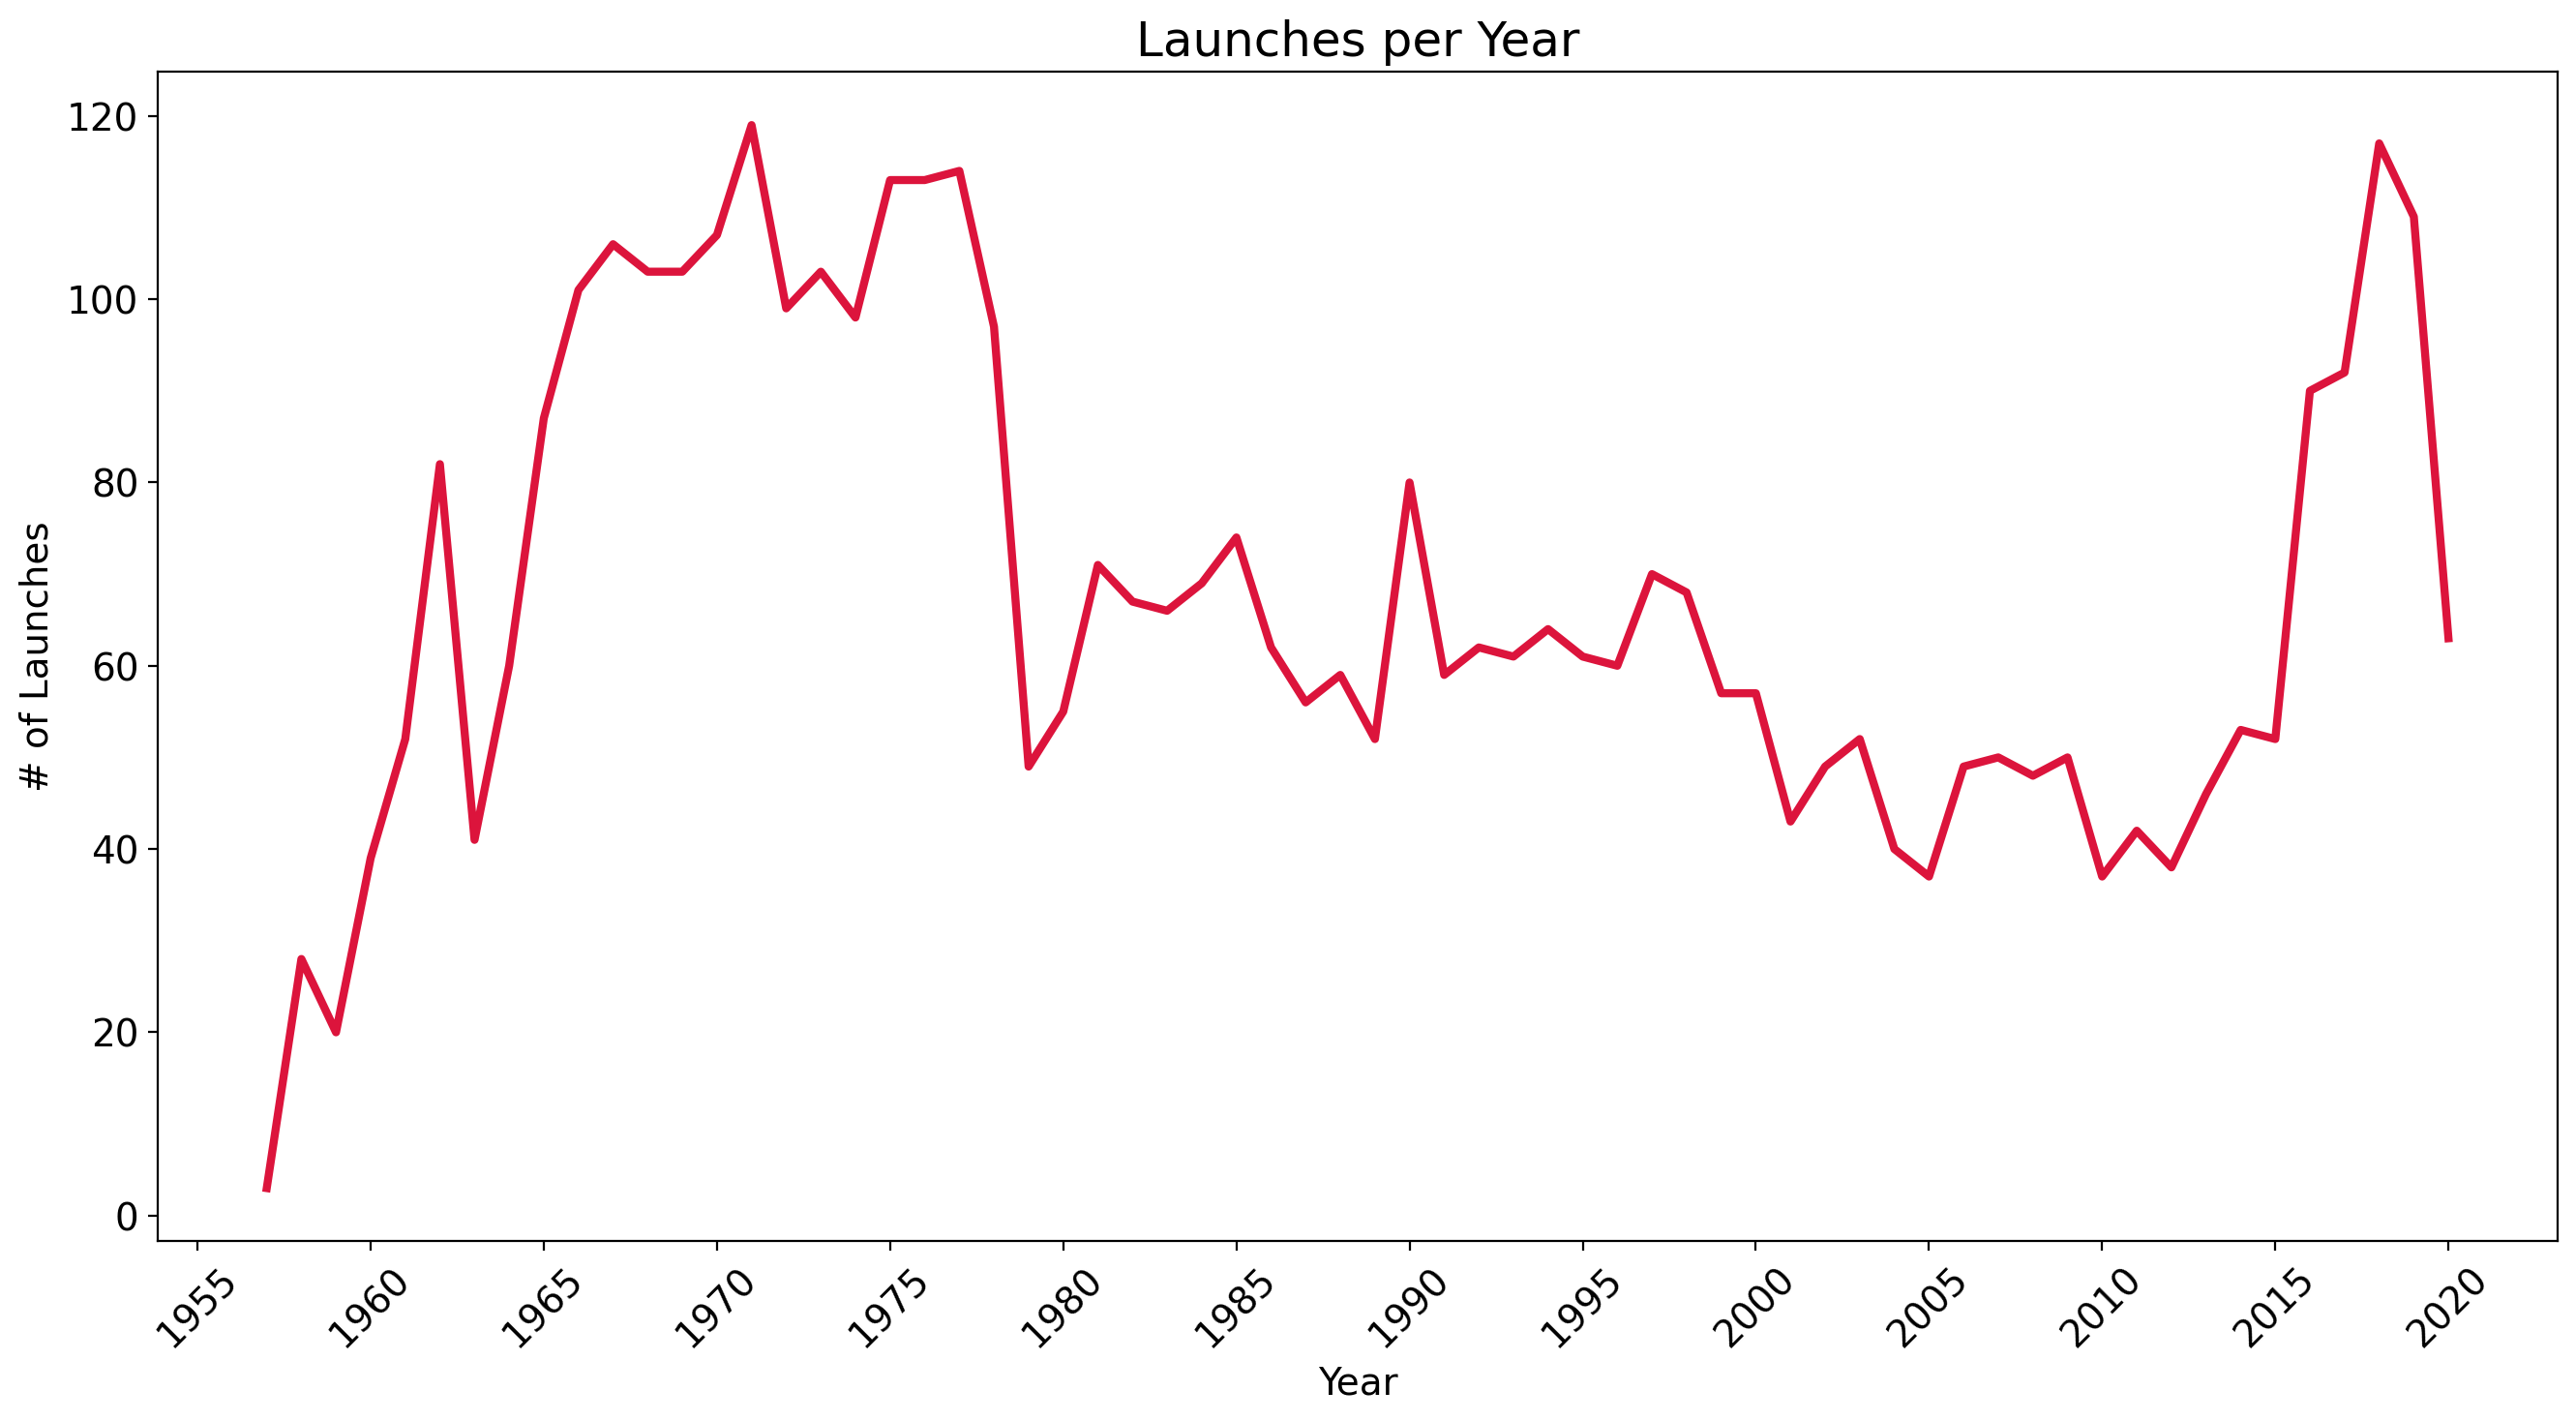

In [78]:
plt.figure(figsize=(16,8), dpi=200)
plt.plot(df_years.Year, df_years.Launches, linewidth=3, c='crimson')
plt.title('Launches per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1955, 2025, step=5), 
           fontsize=14, 
           rotation=45)
plt.xlabel('Year', fontsize=14)
plt.ylabel('# of Launches', fontsize=14)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

It seems as though December is the best time for launches. However, variability between months does not seem to indicate a significant trend.

In [ ]:
months = []
for m in df_data.Date:
  months.append(m.month)

df_data['Months'] = months

df_data.sample(2)

In [ ]:
df_months = df_data.groupby('Months', as_index=False).agg({'Mission_Status':pd.Series.count})
df_months

In [81]:
bar = px.bar(df_months, x='Months', y='Mission_Status', log_y=False, 
             title='Launches by Month'
             )
bar.update_layout(xaxis_title='Month #', yaxis_title='# of Launches')
bar.update_traces(marker_color='navy')
bar.show()

# How has the Launch Price varied Over Time? 

It is important to note that these dataframes do not take into account inflation. That being said, it seems as though the price per launch is trending downwards perhaps due to more efficient manufacturing and engineering techniques.

In [ ]:
years = []
for y in df_clean.Date:
  years.append(y.year)

df_clean['Year'] = years

df_price = df_clean.groupby('Year', as_index=False).agg({'Price':pd.Series.mean})
df_price

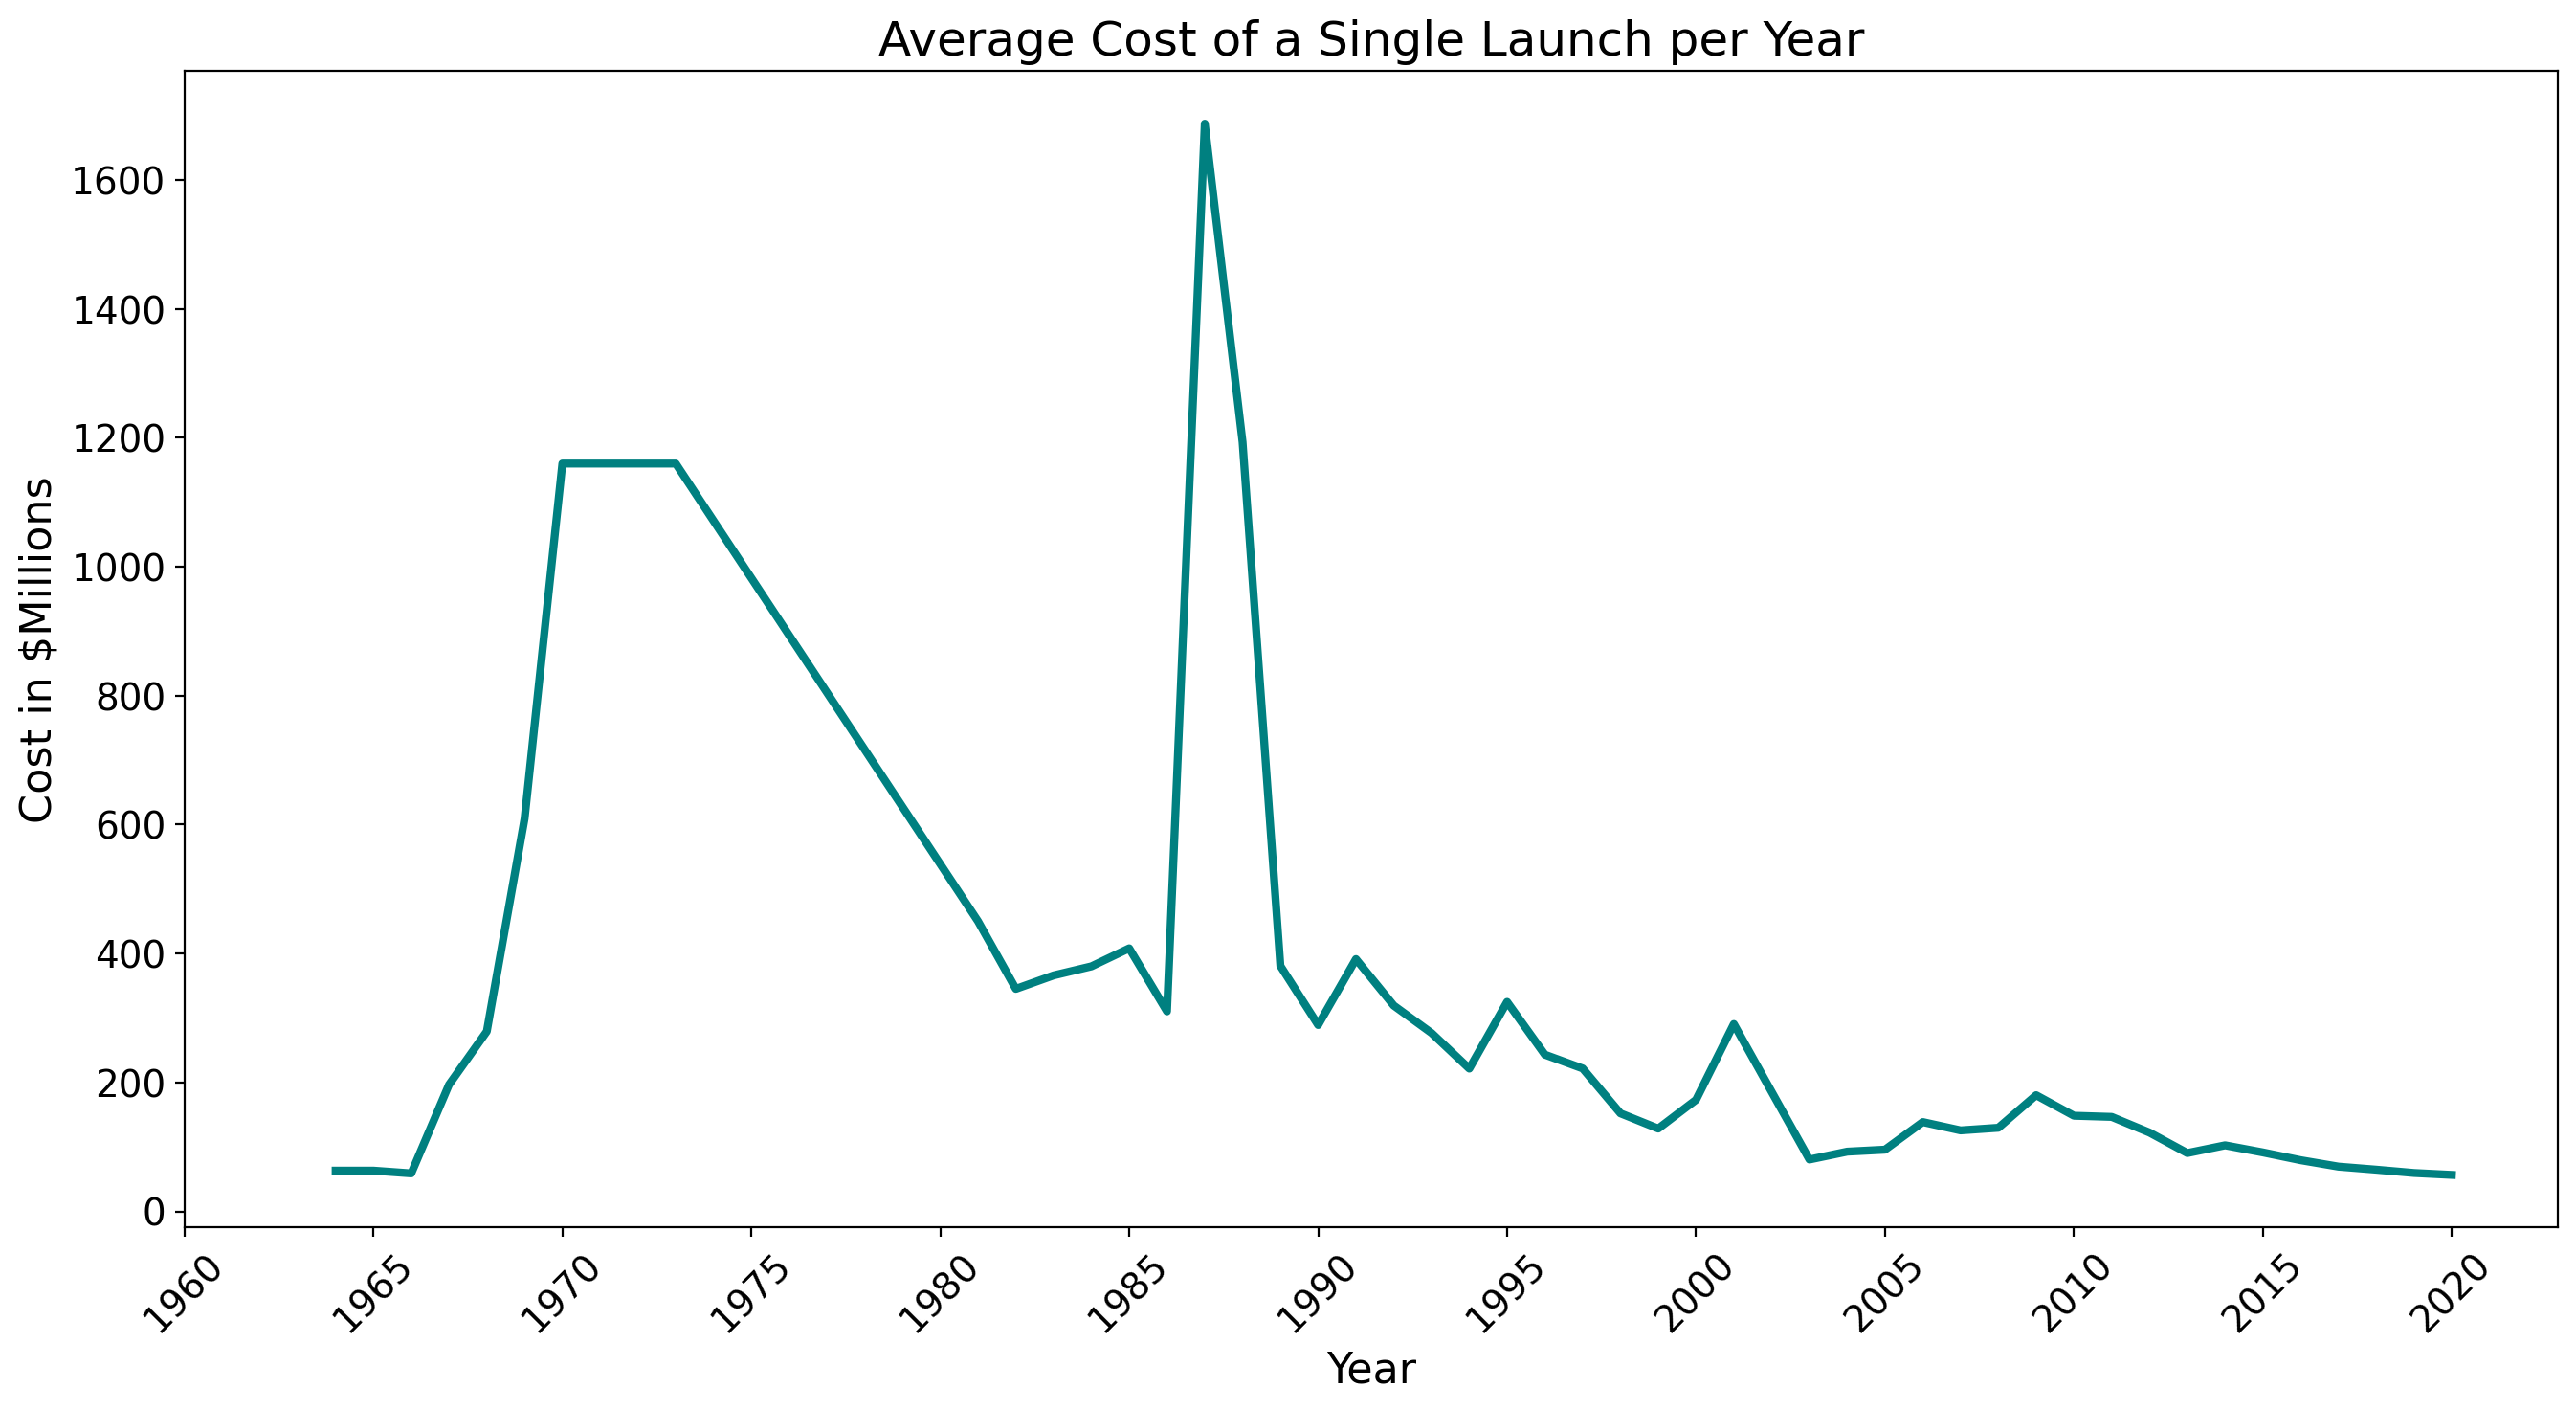

In [83]:
plt.figure(figsize=(16,8), dpi=200)
plt.plot(df_price.Year, df_price.Price, linewidth=3, c='teal')
plt.title('Average Cost of a Single Launch per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1960, 2025, step=5), 
           fontsize=14, 
           rotation=45)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Cost in $Millions', fontsize=16)
plt.show()

# Worldwide Expenditure on Rocket Launches

By superimposing a graph of the total worldwide expenditure on rocket launches we can see that although the average cost of launches has decreased, the world as a whole is spending more on their space programs. This trend will likely continue as more and more countries develop and invest in space flight technologies.

In [ ]:
df_rolling = df_clean.groupby('Year').agg({'Price':pd.Series.sum})
df_rolling = df_rolling.rolling(window=5).mean()
df_rolling

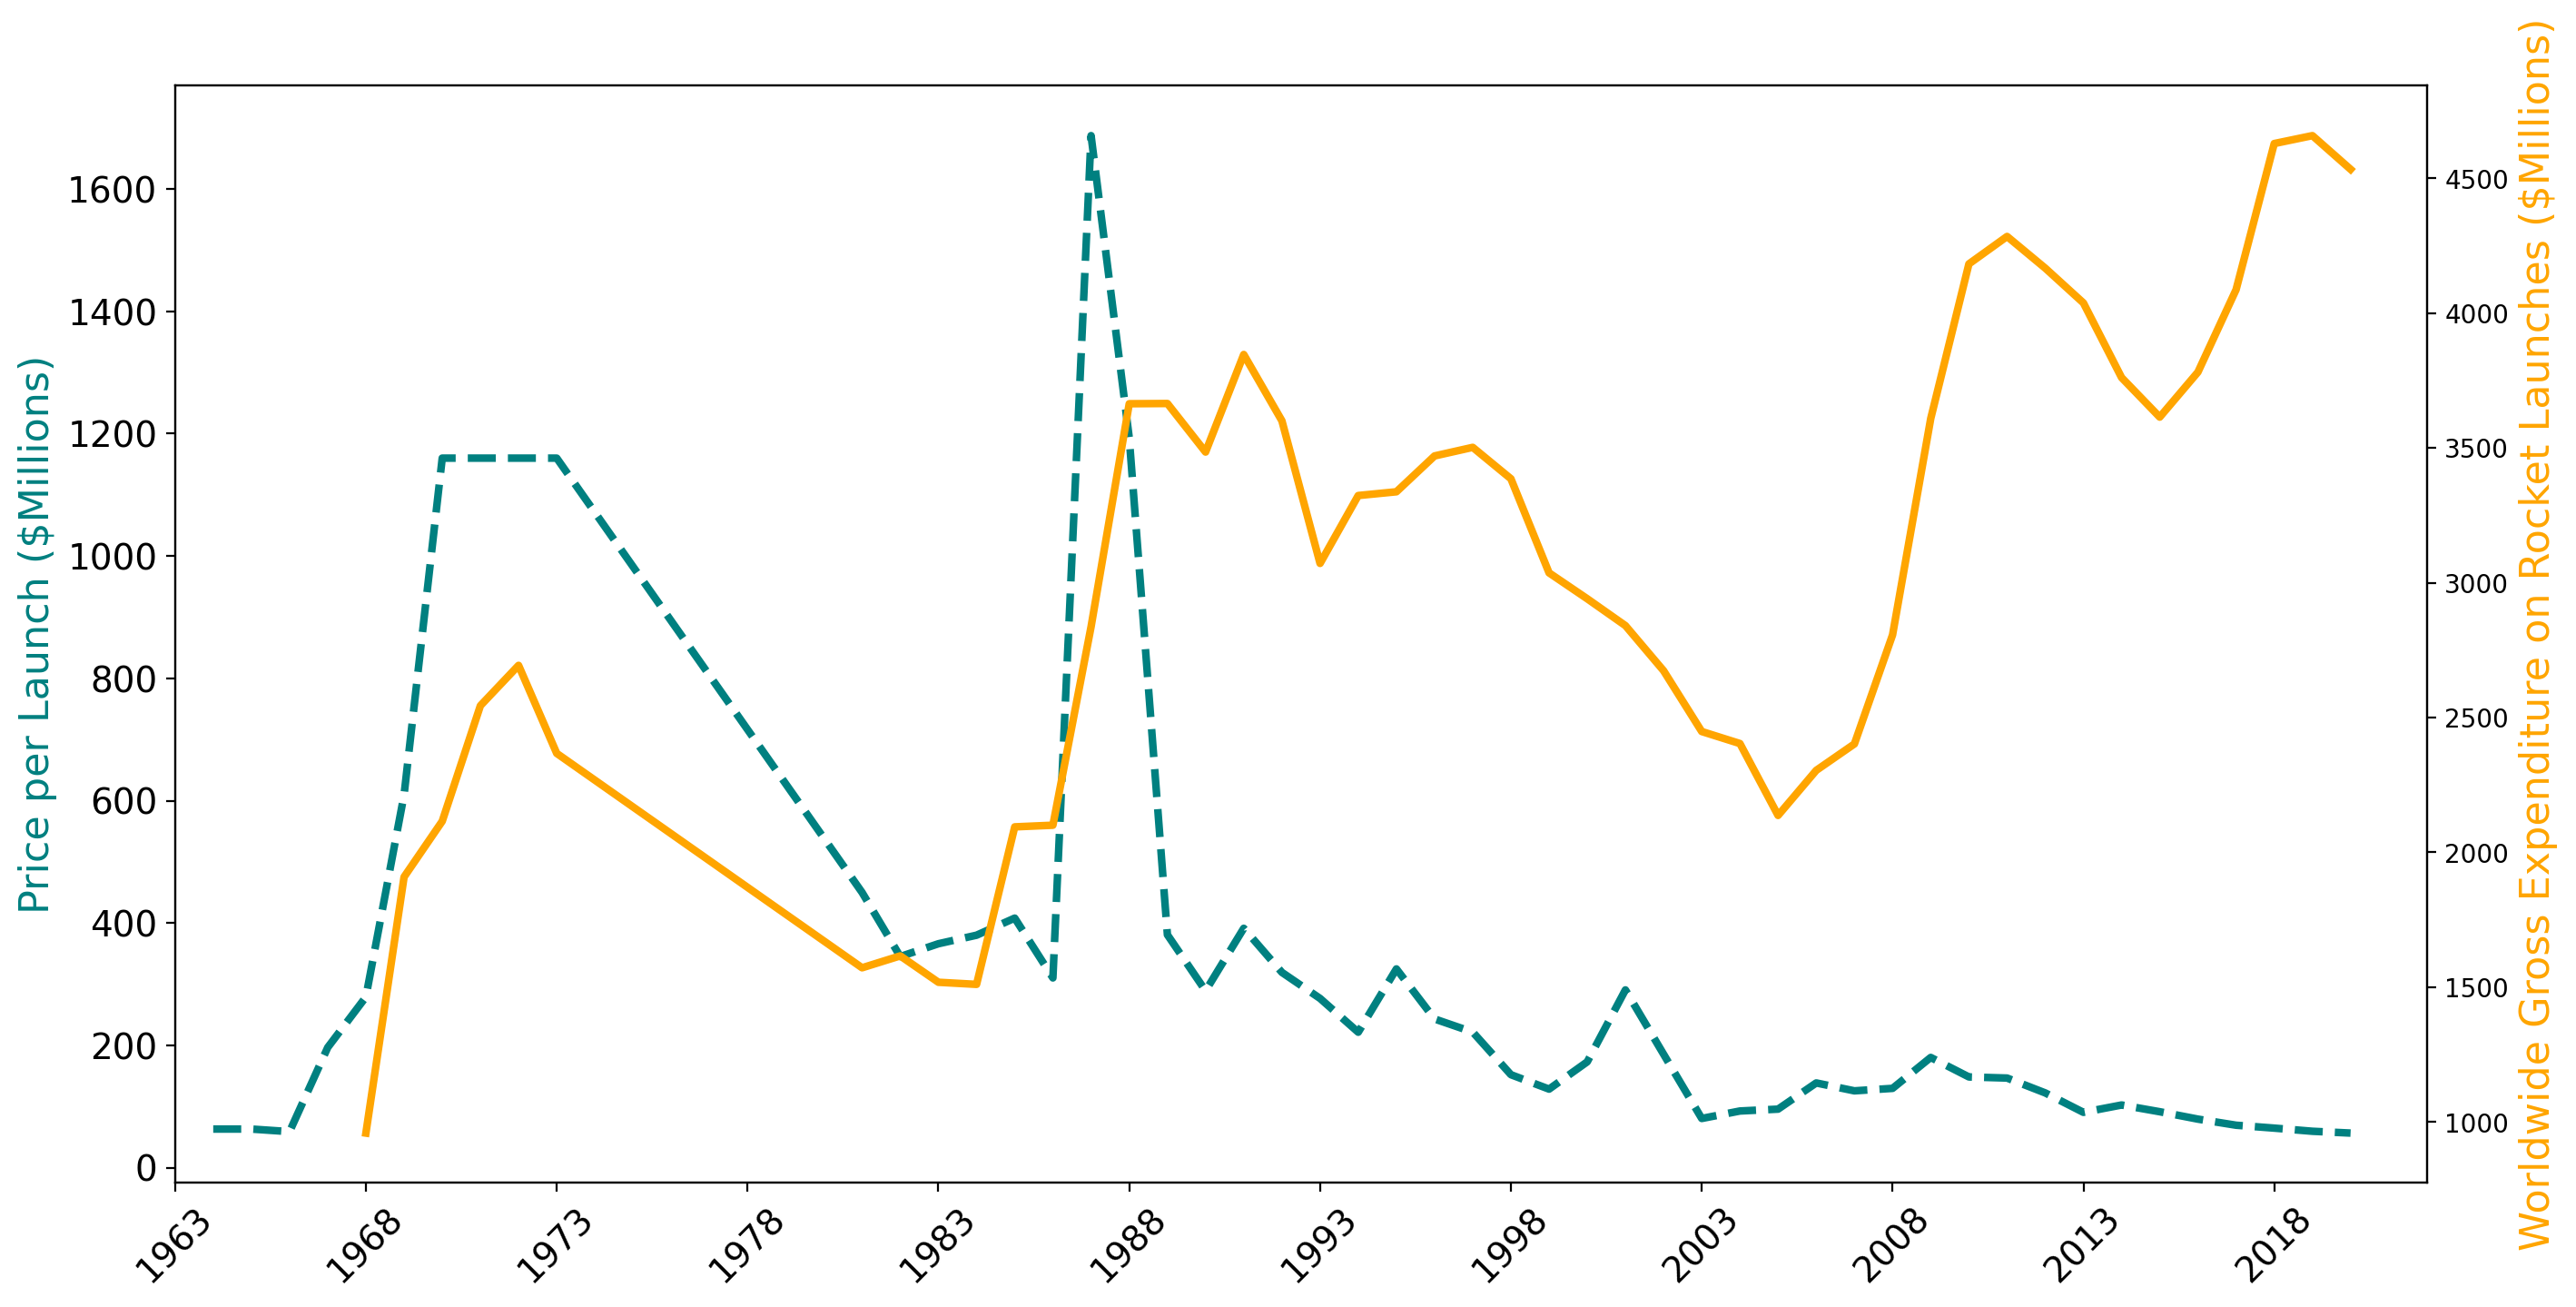

In [85]:
plt.figure(figsize=(16,8), dpi=200)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1963, 2022, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1963, 2022)

ax1.plot(df_price.Year, 
         df_price.Price,  
         c='teal',  
        linewidth=3,
        linestyle='--')
 
# Adding prize share plot on second axis
ax2.plot(df_rolling.index, 
        df_rolling.values, 
        c='orange', 
        linewidth=3,)

ax1.set_ylabel('Price per Launch ($Millions)', color='teal', fontsize=16)
ax2.set_ylabel('Worldwide Gross Expenditure on Rocket Launches ($Millions)', color='orange', fontsize=16)
 
plt.show()

# Number of Launches over Time by the Top 10 Organisations. 

RVSN Russia has by far the most launches. However, the organisation fell apart along with the Soviet Union. Recently, CASC has come to the forefront, conducting the most rocket launches on almost a year by year basis since 2015. On the other hand, agencies such as NASA and the French Arianespace have produced a consistent number of launches over the years. 

In [ ]:
df_org10 = df_data.groupby('Organisation').agg({'Mission_Status':pd.Series.count})
df_org10.sort_values('Mission_Status', ascending=False, inplace=True)
org10 = []
for org in df_org10.index[:10]:
  org10.append(org)

org10

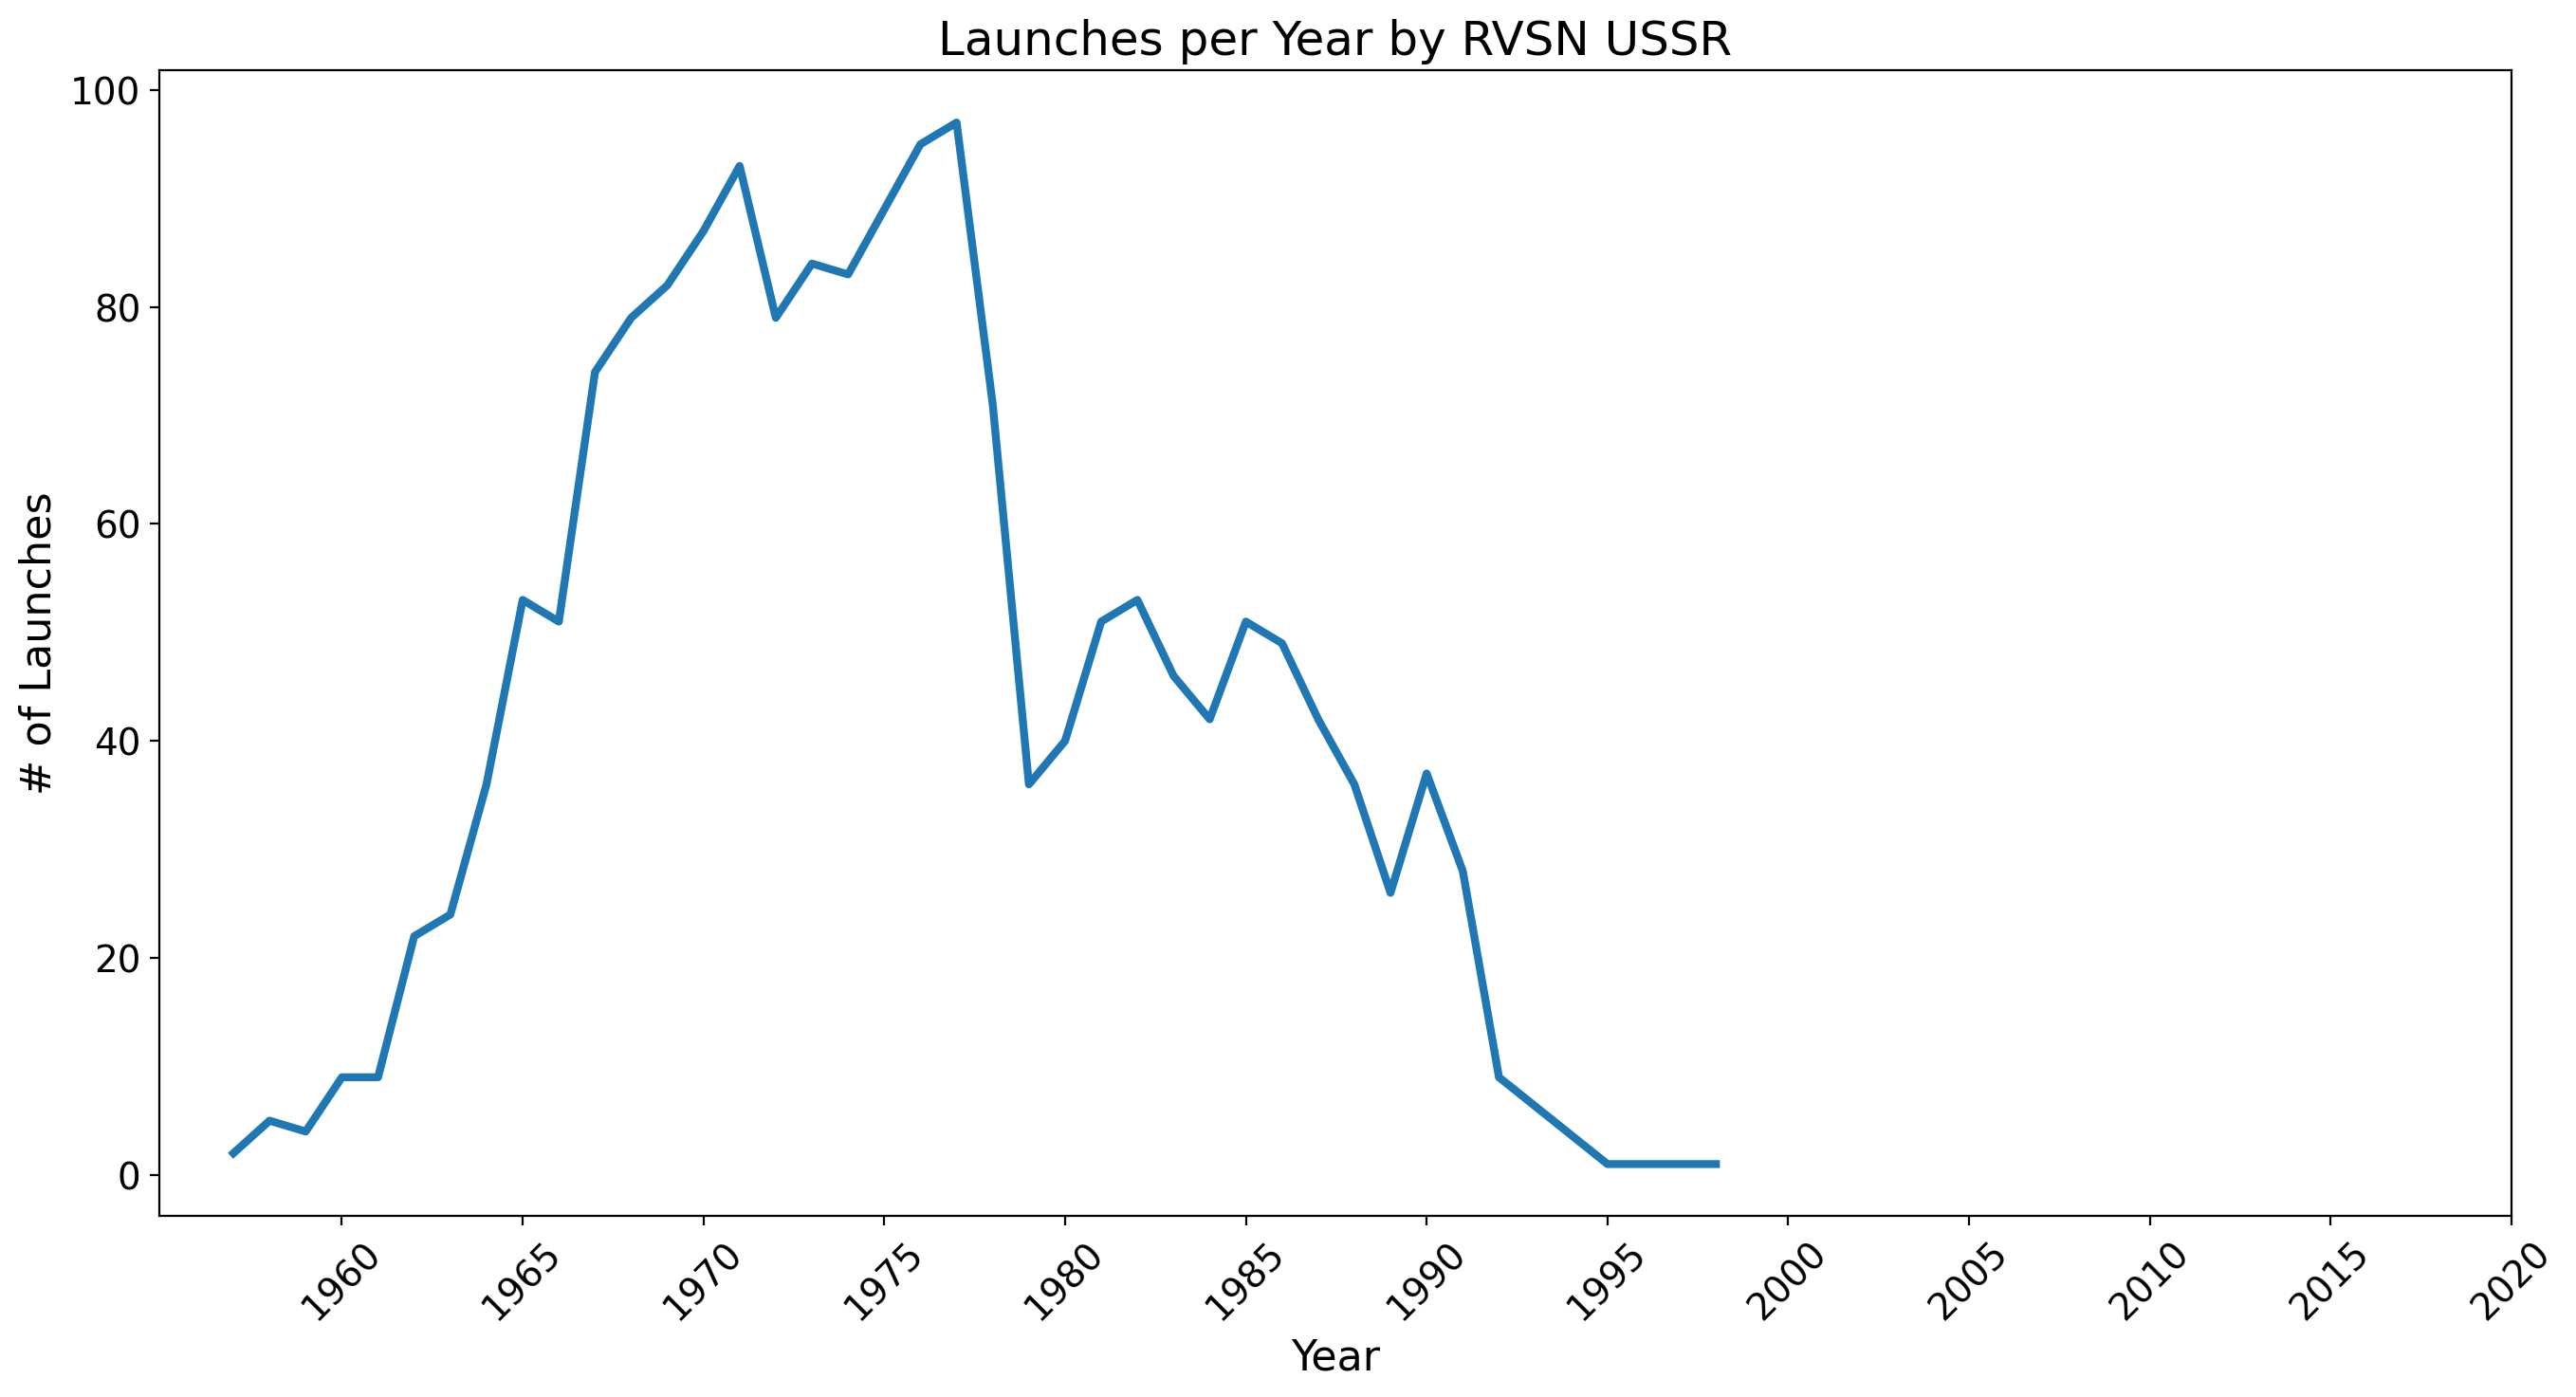

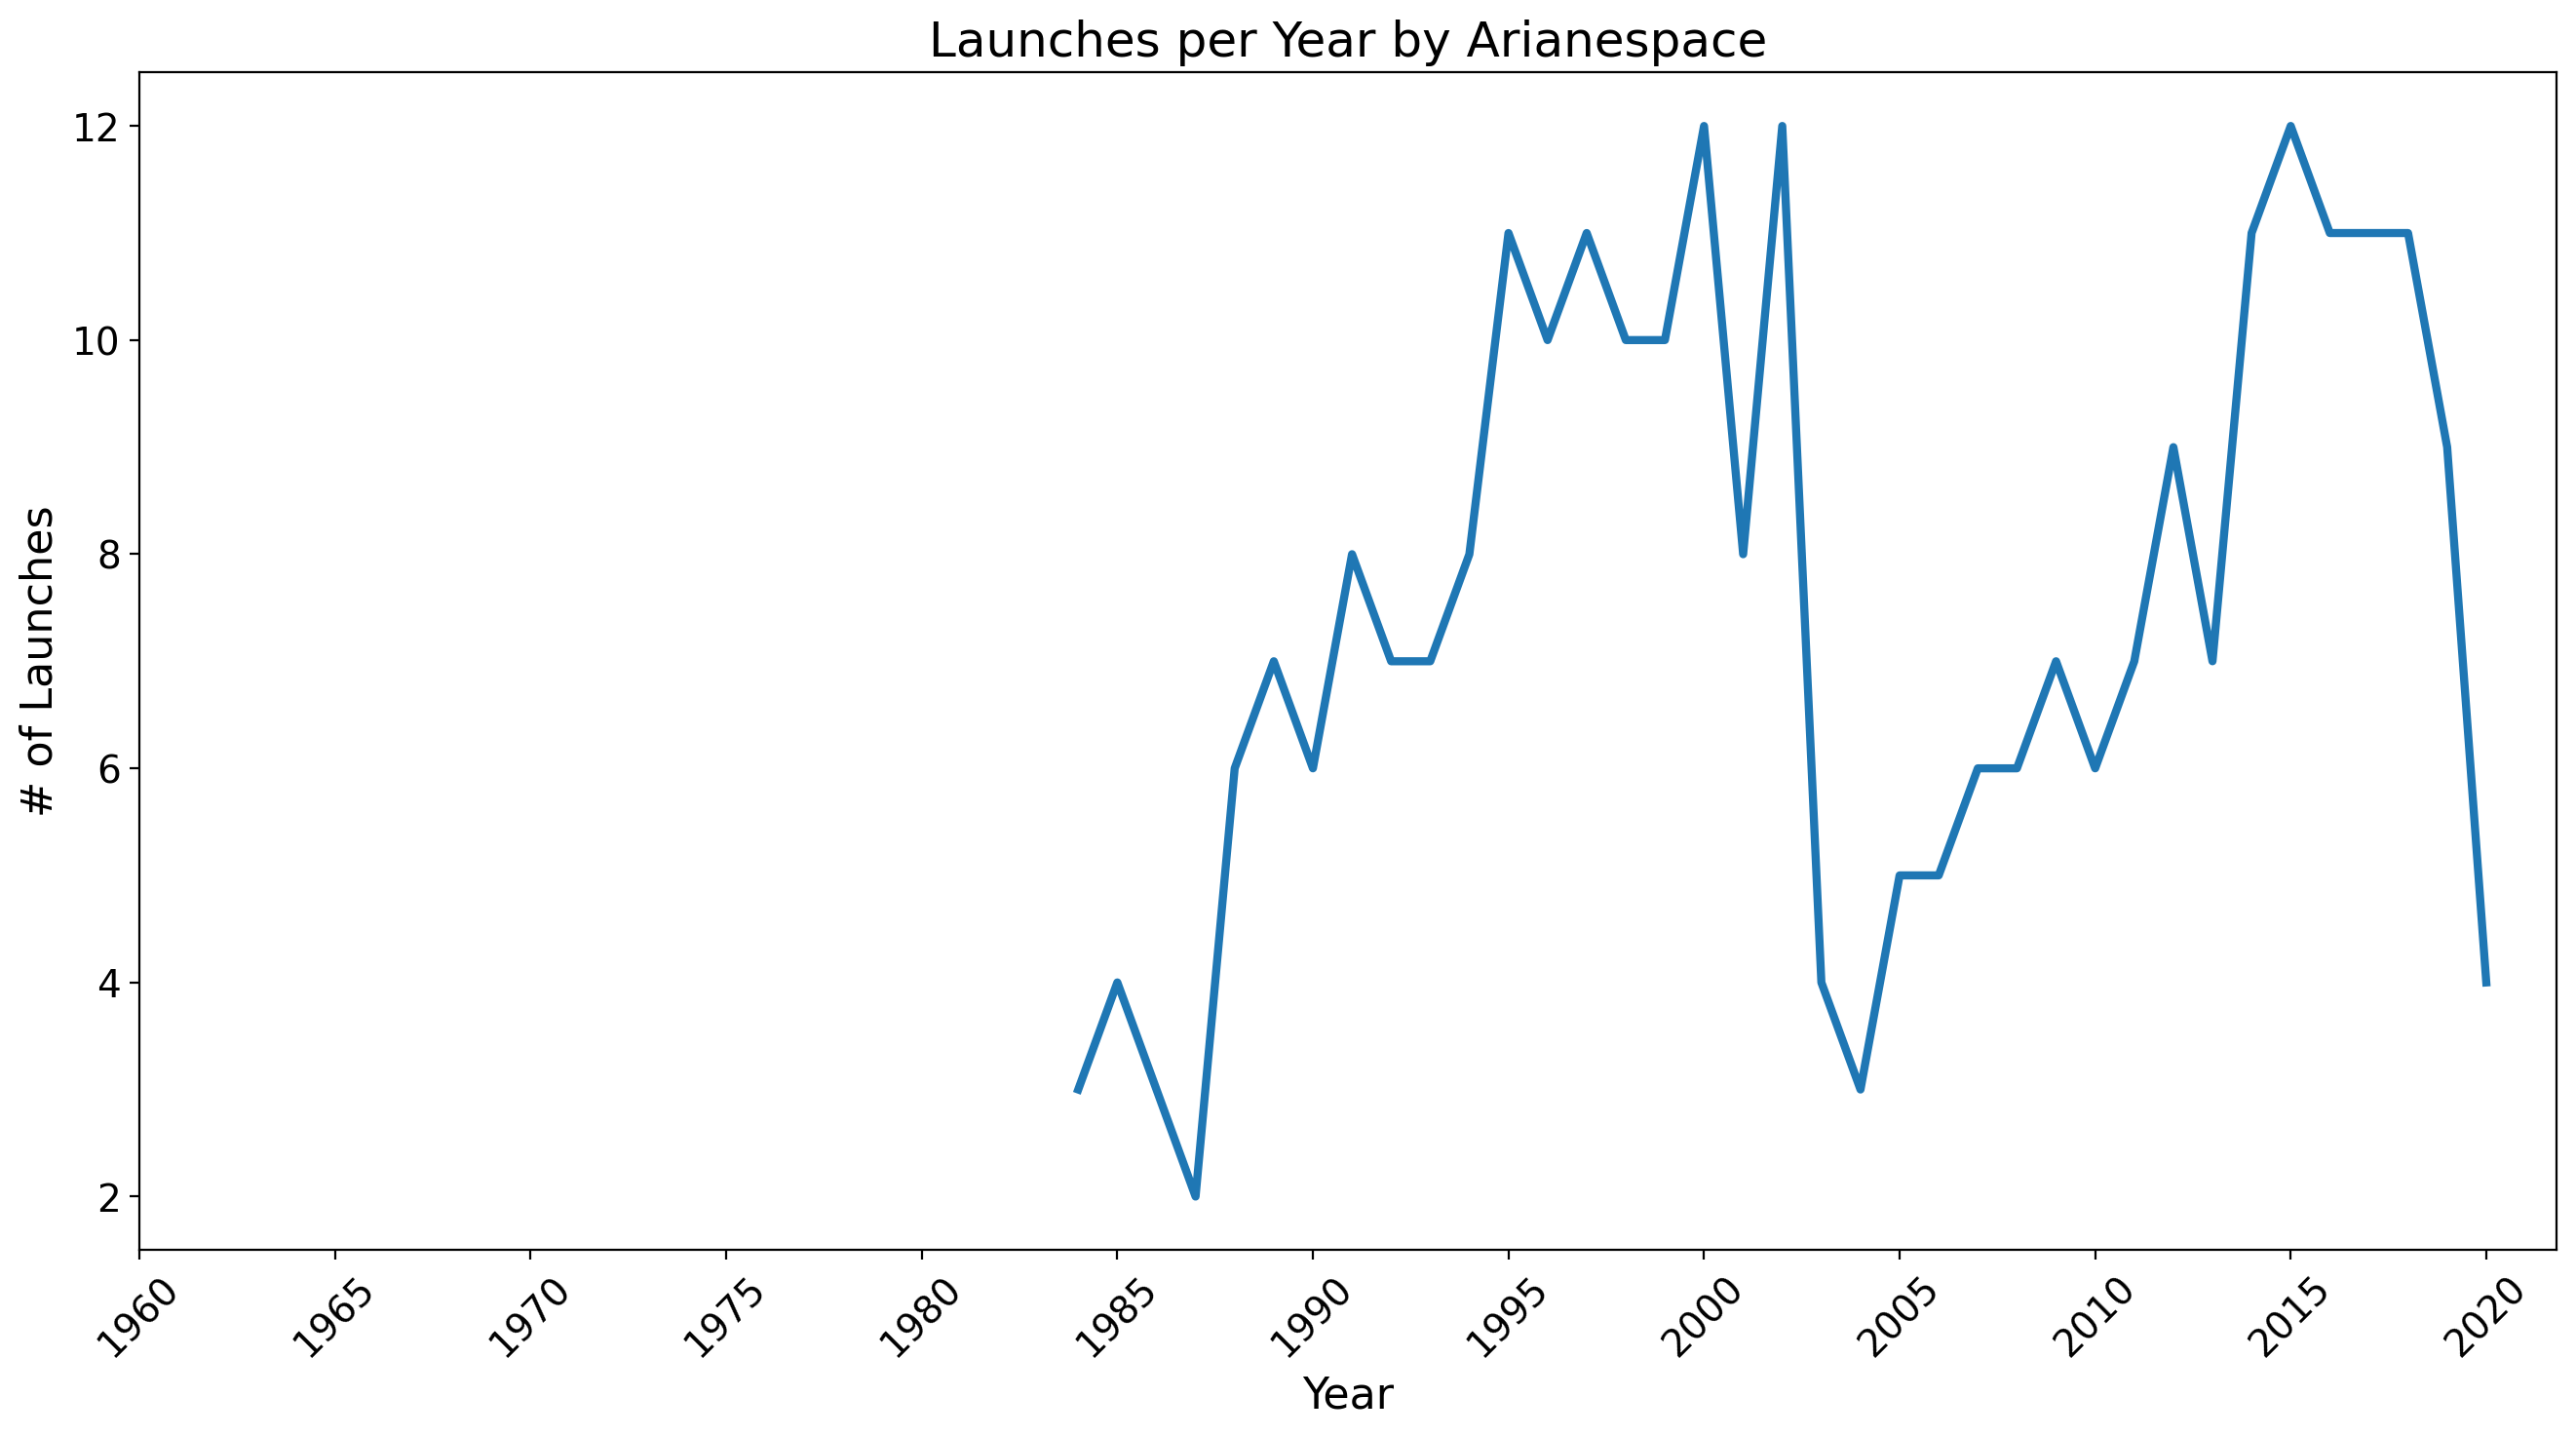

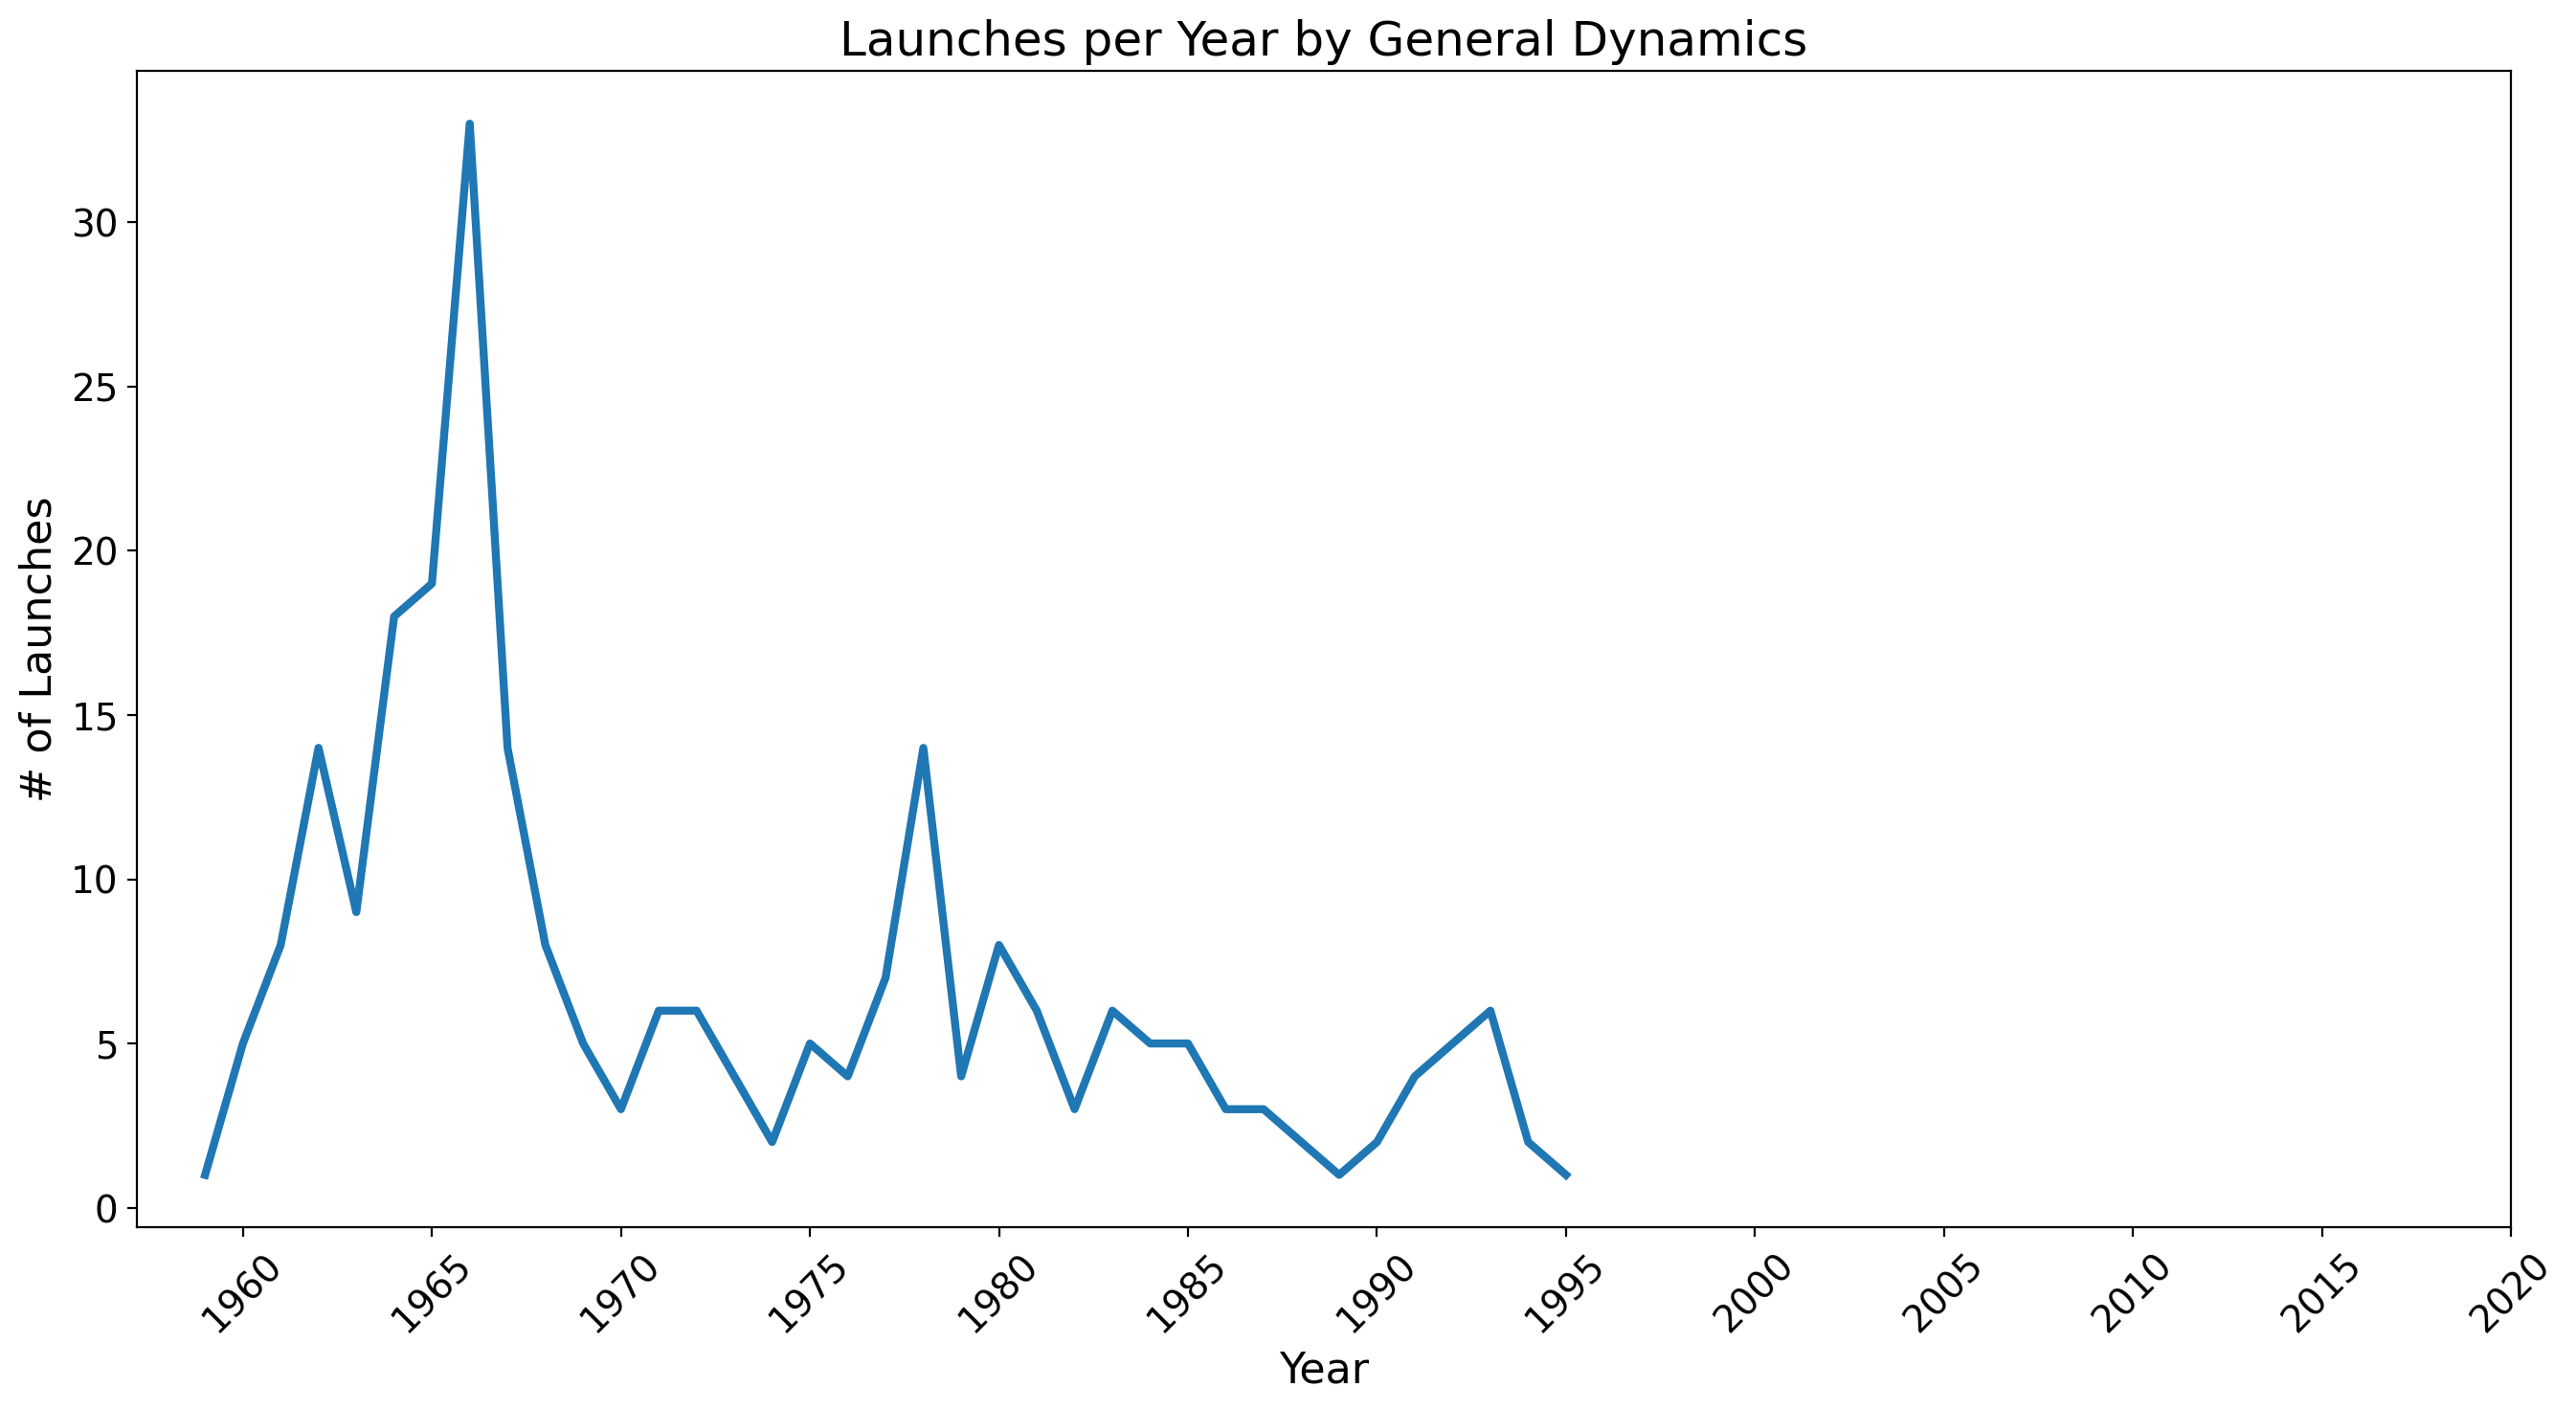

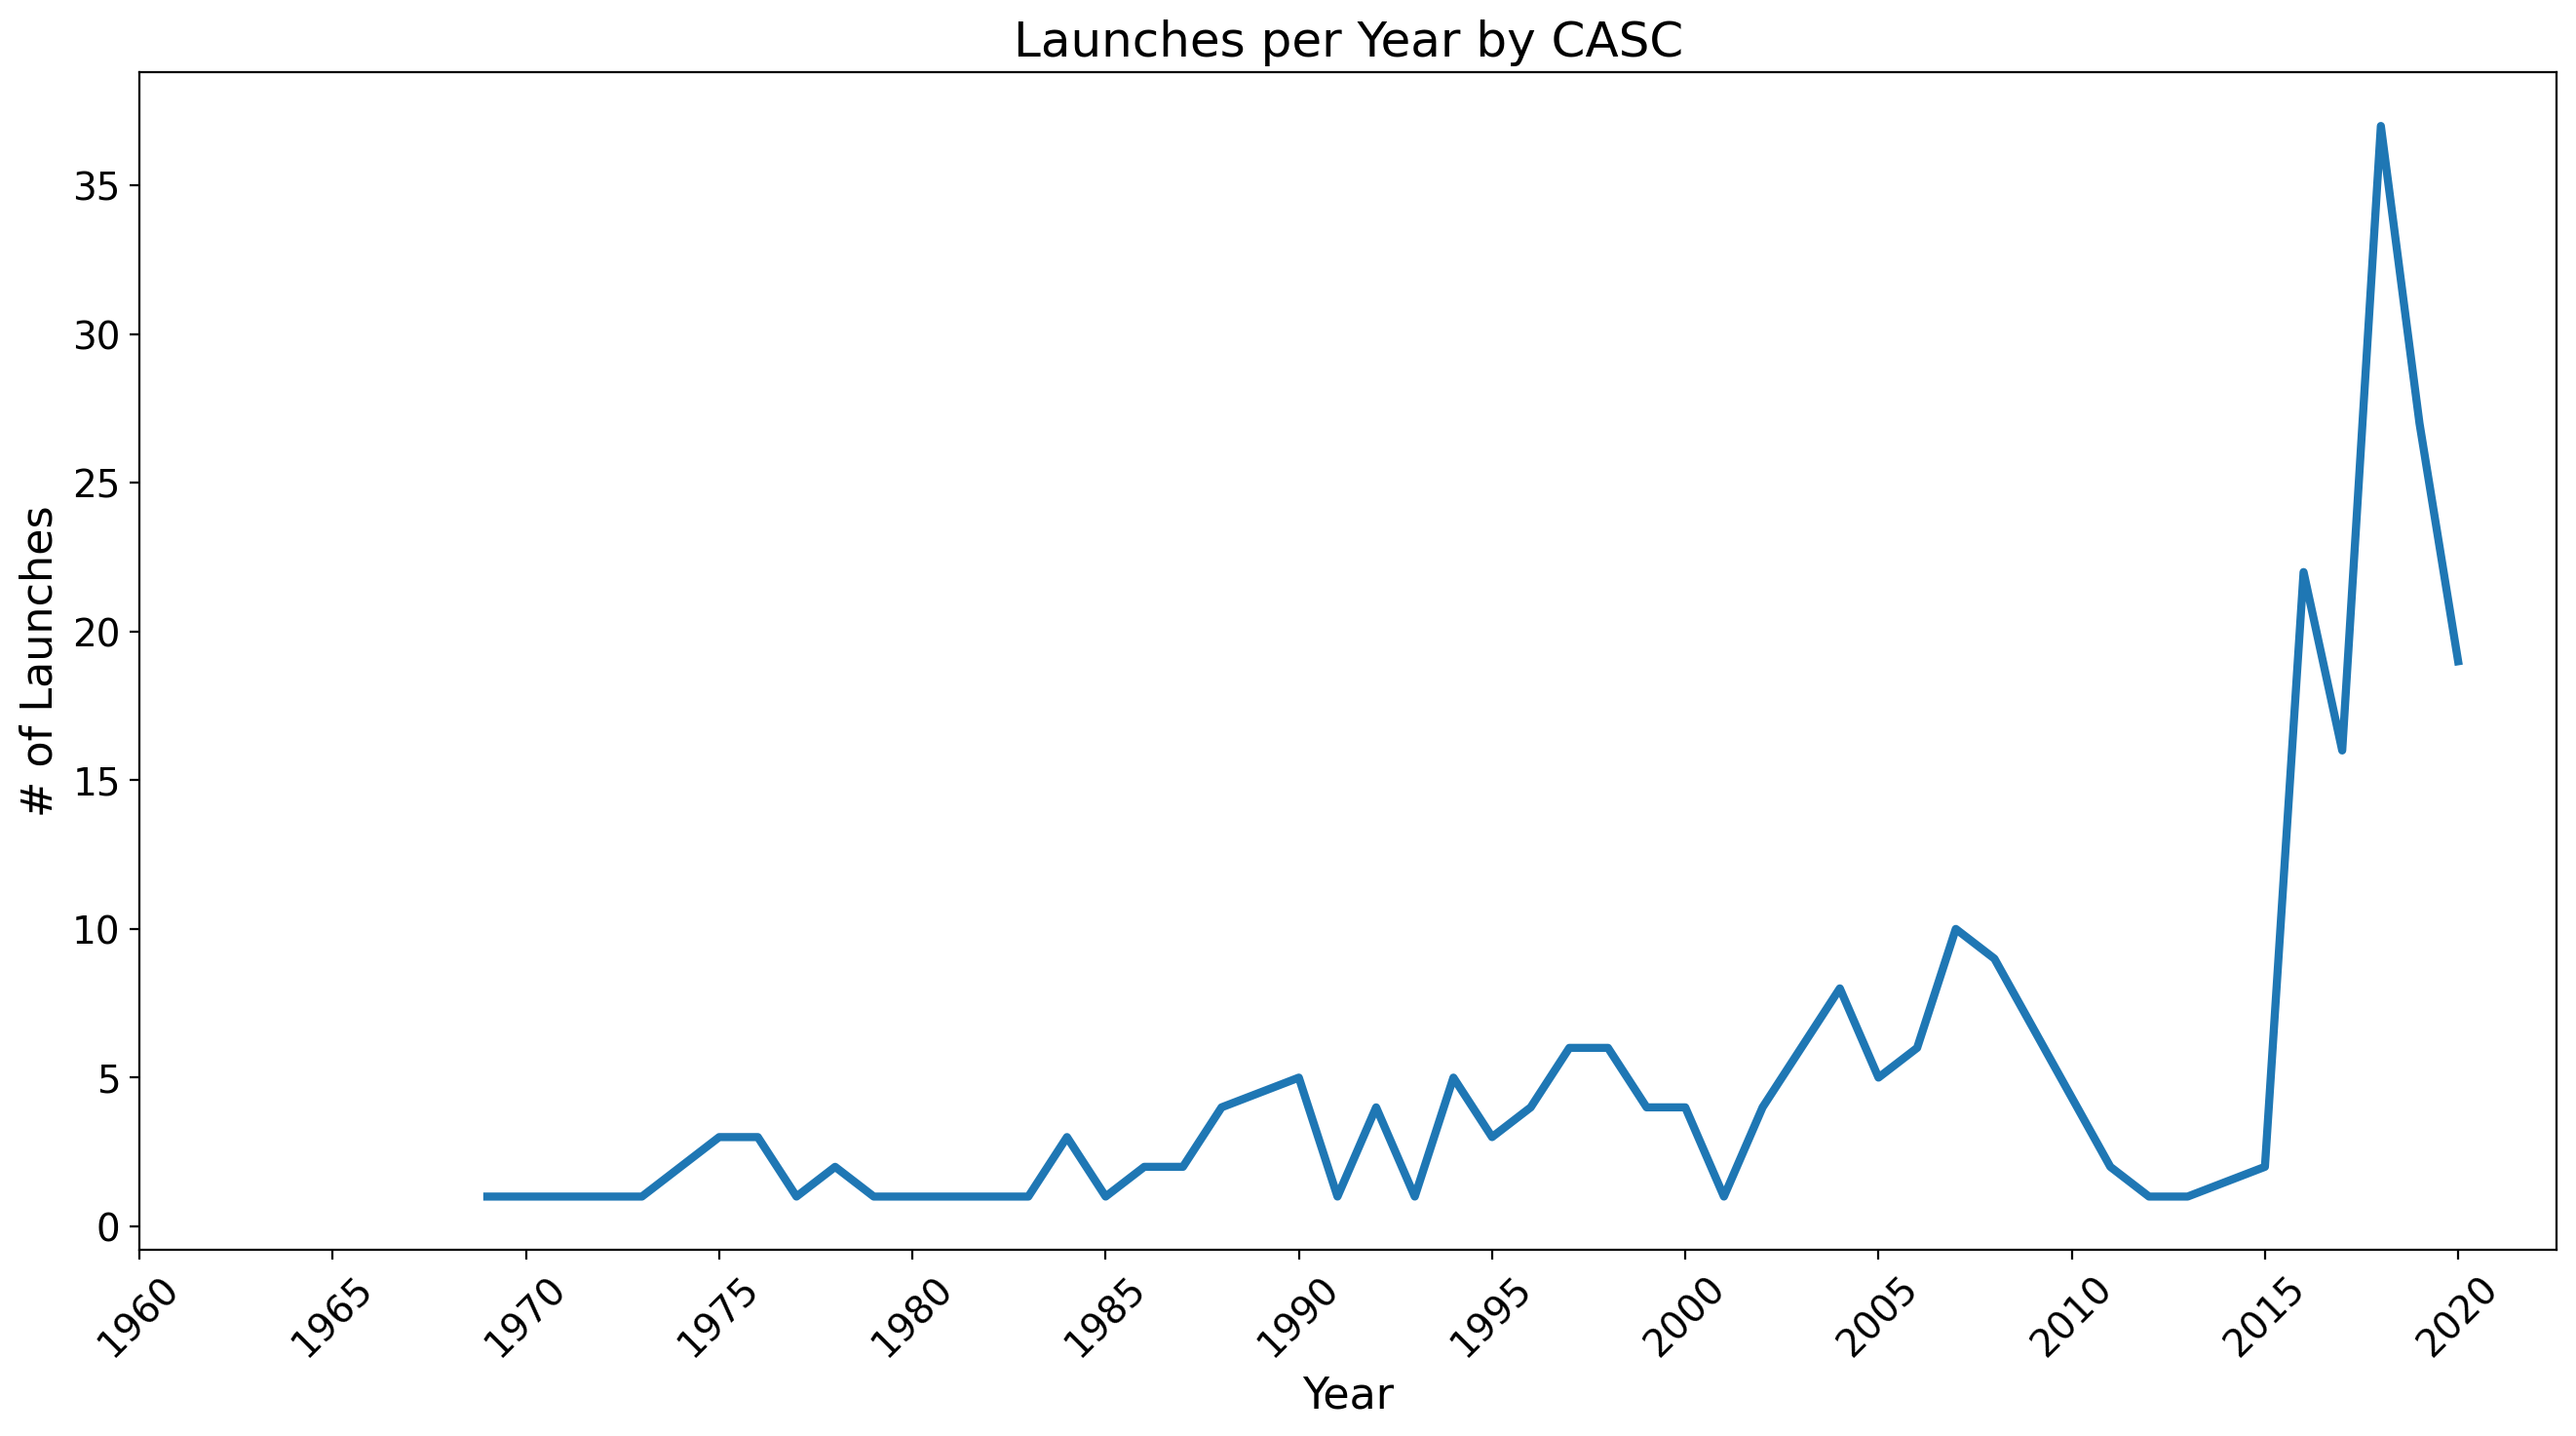

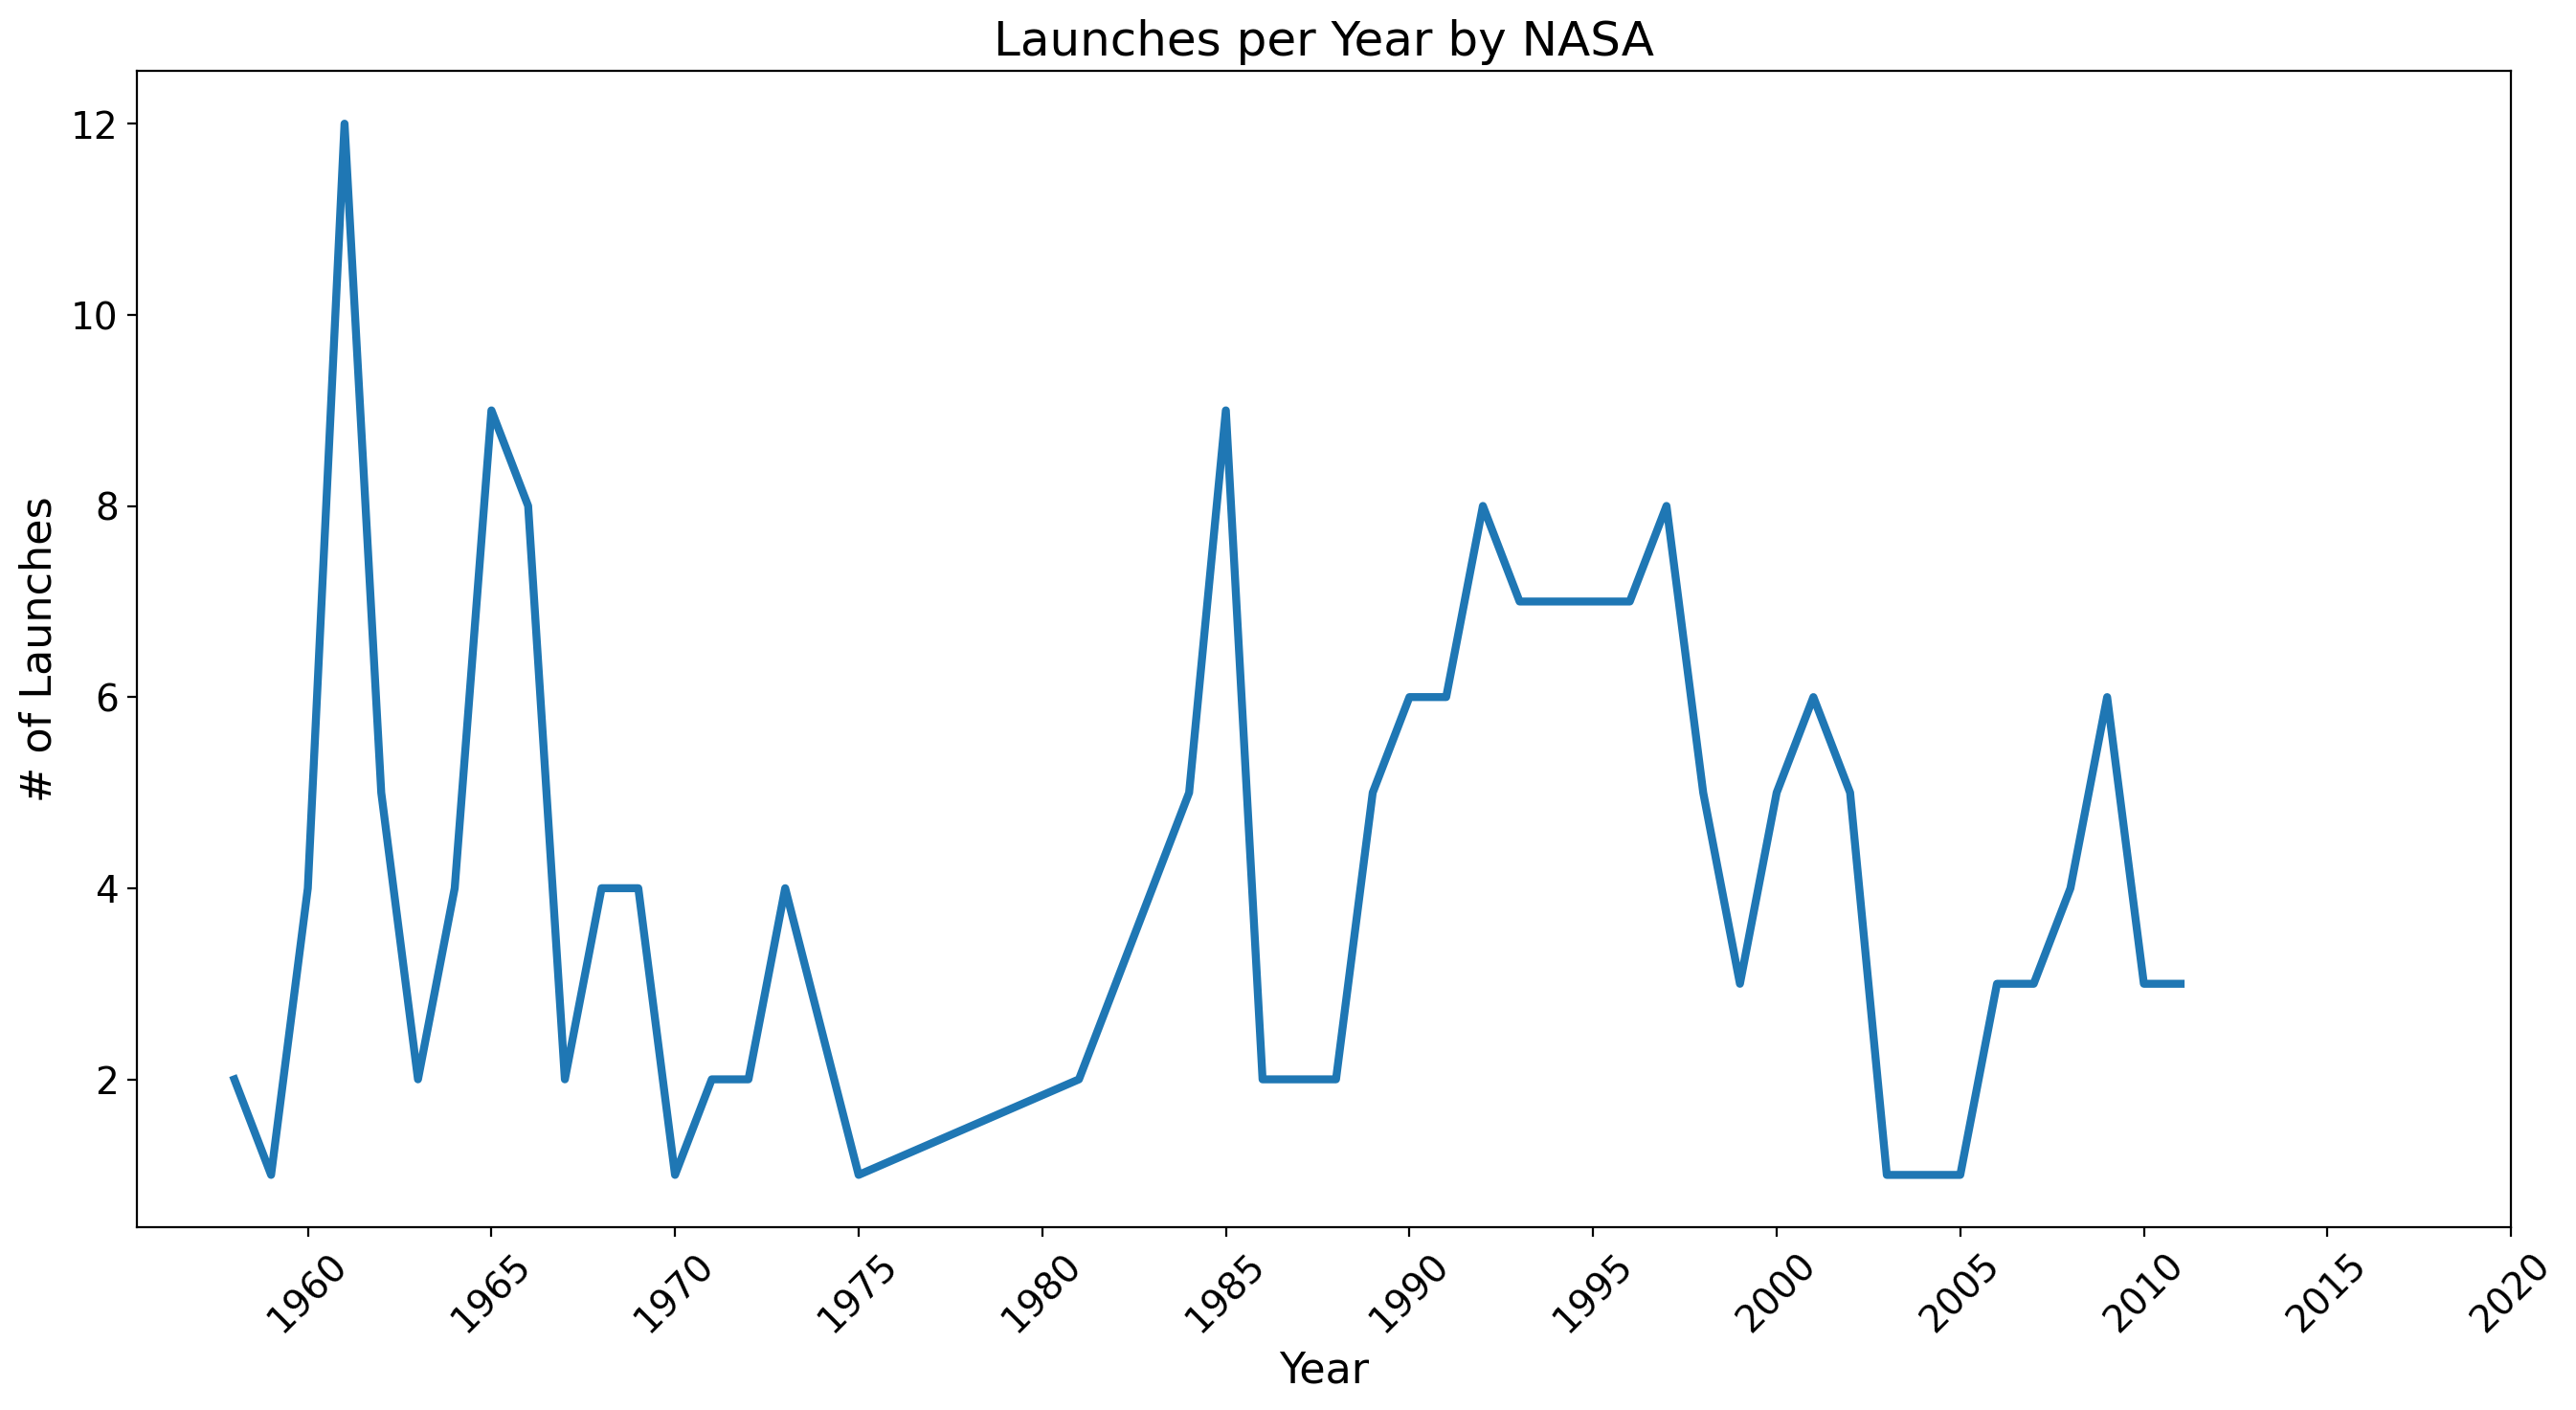

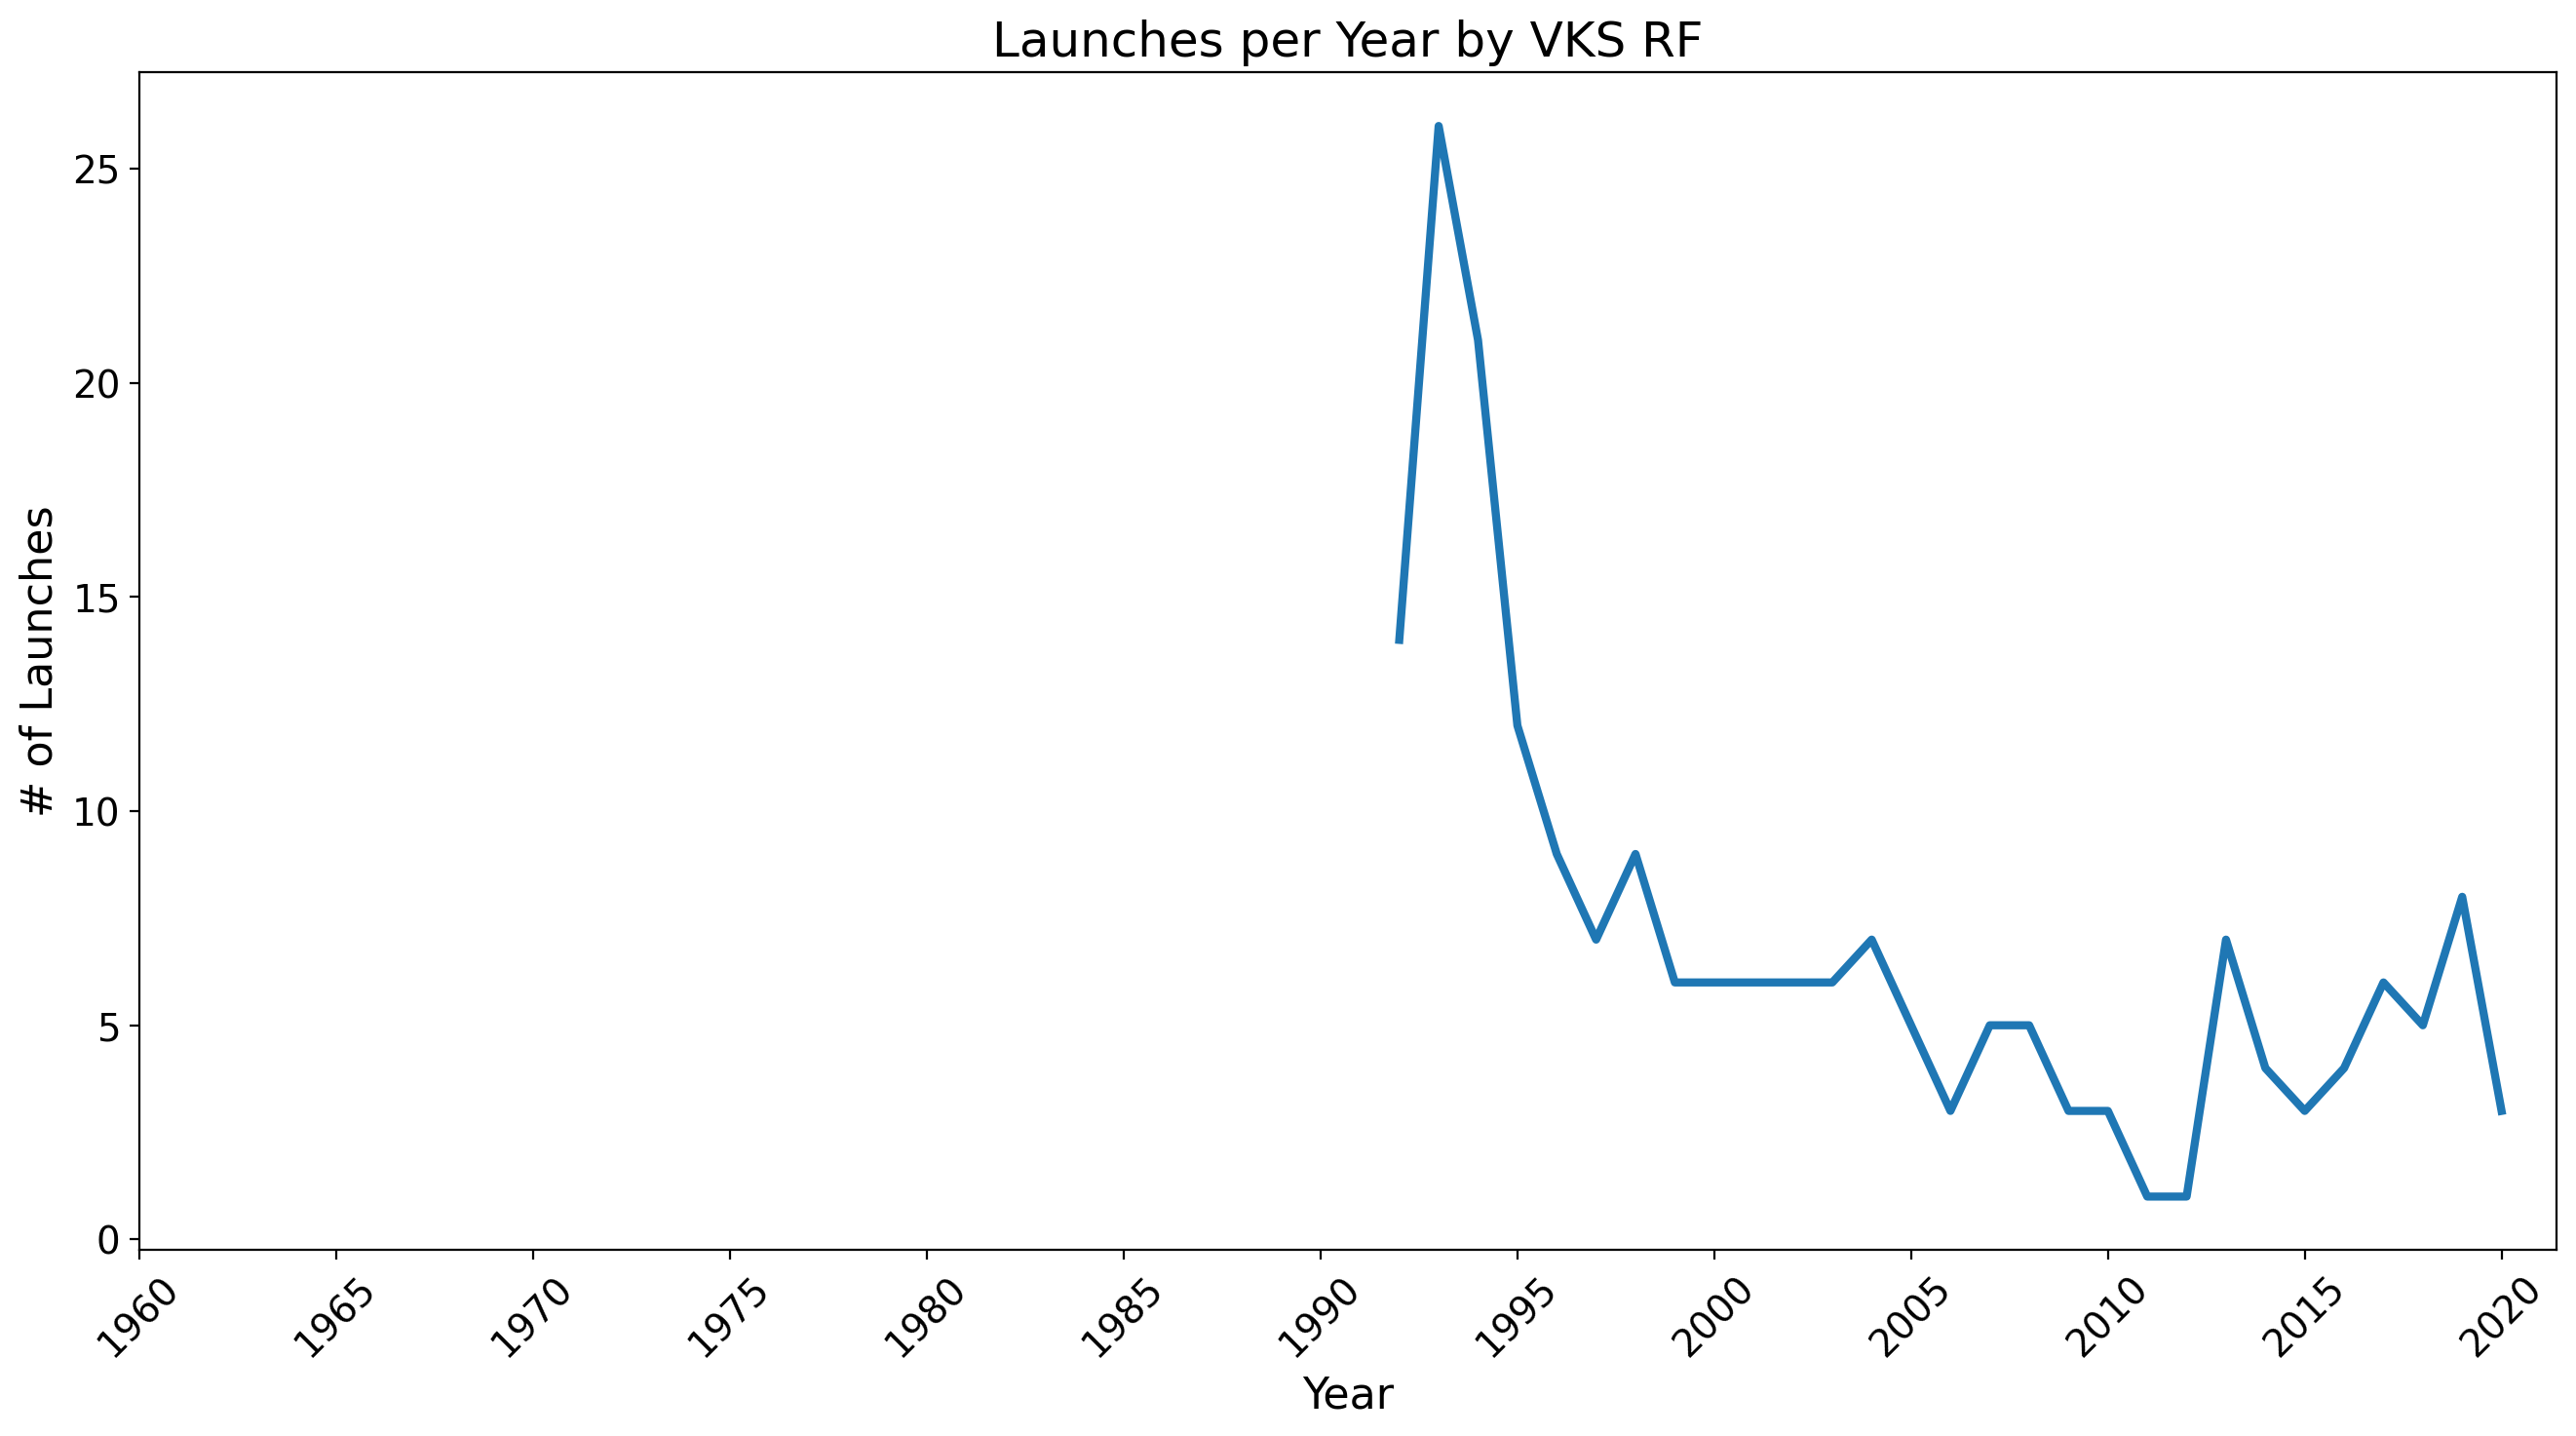

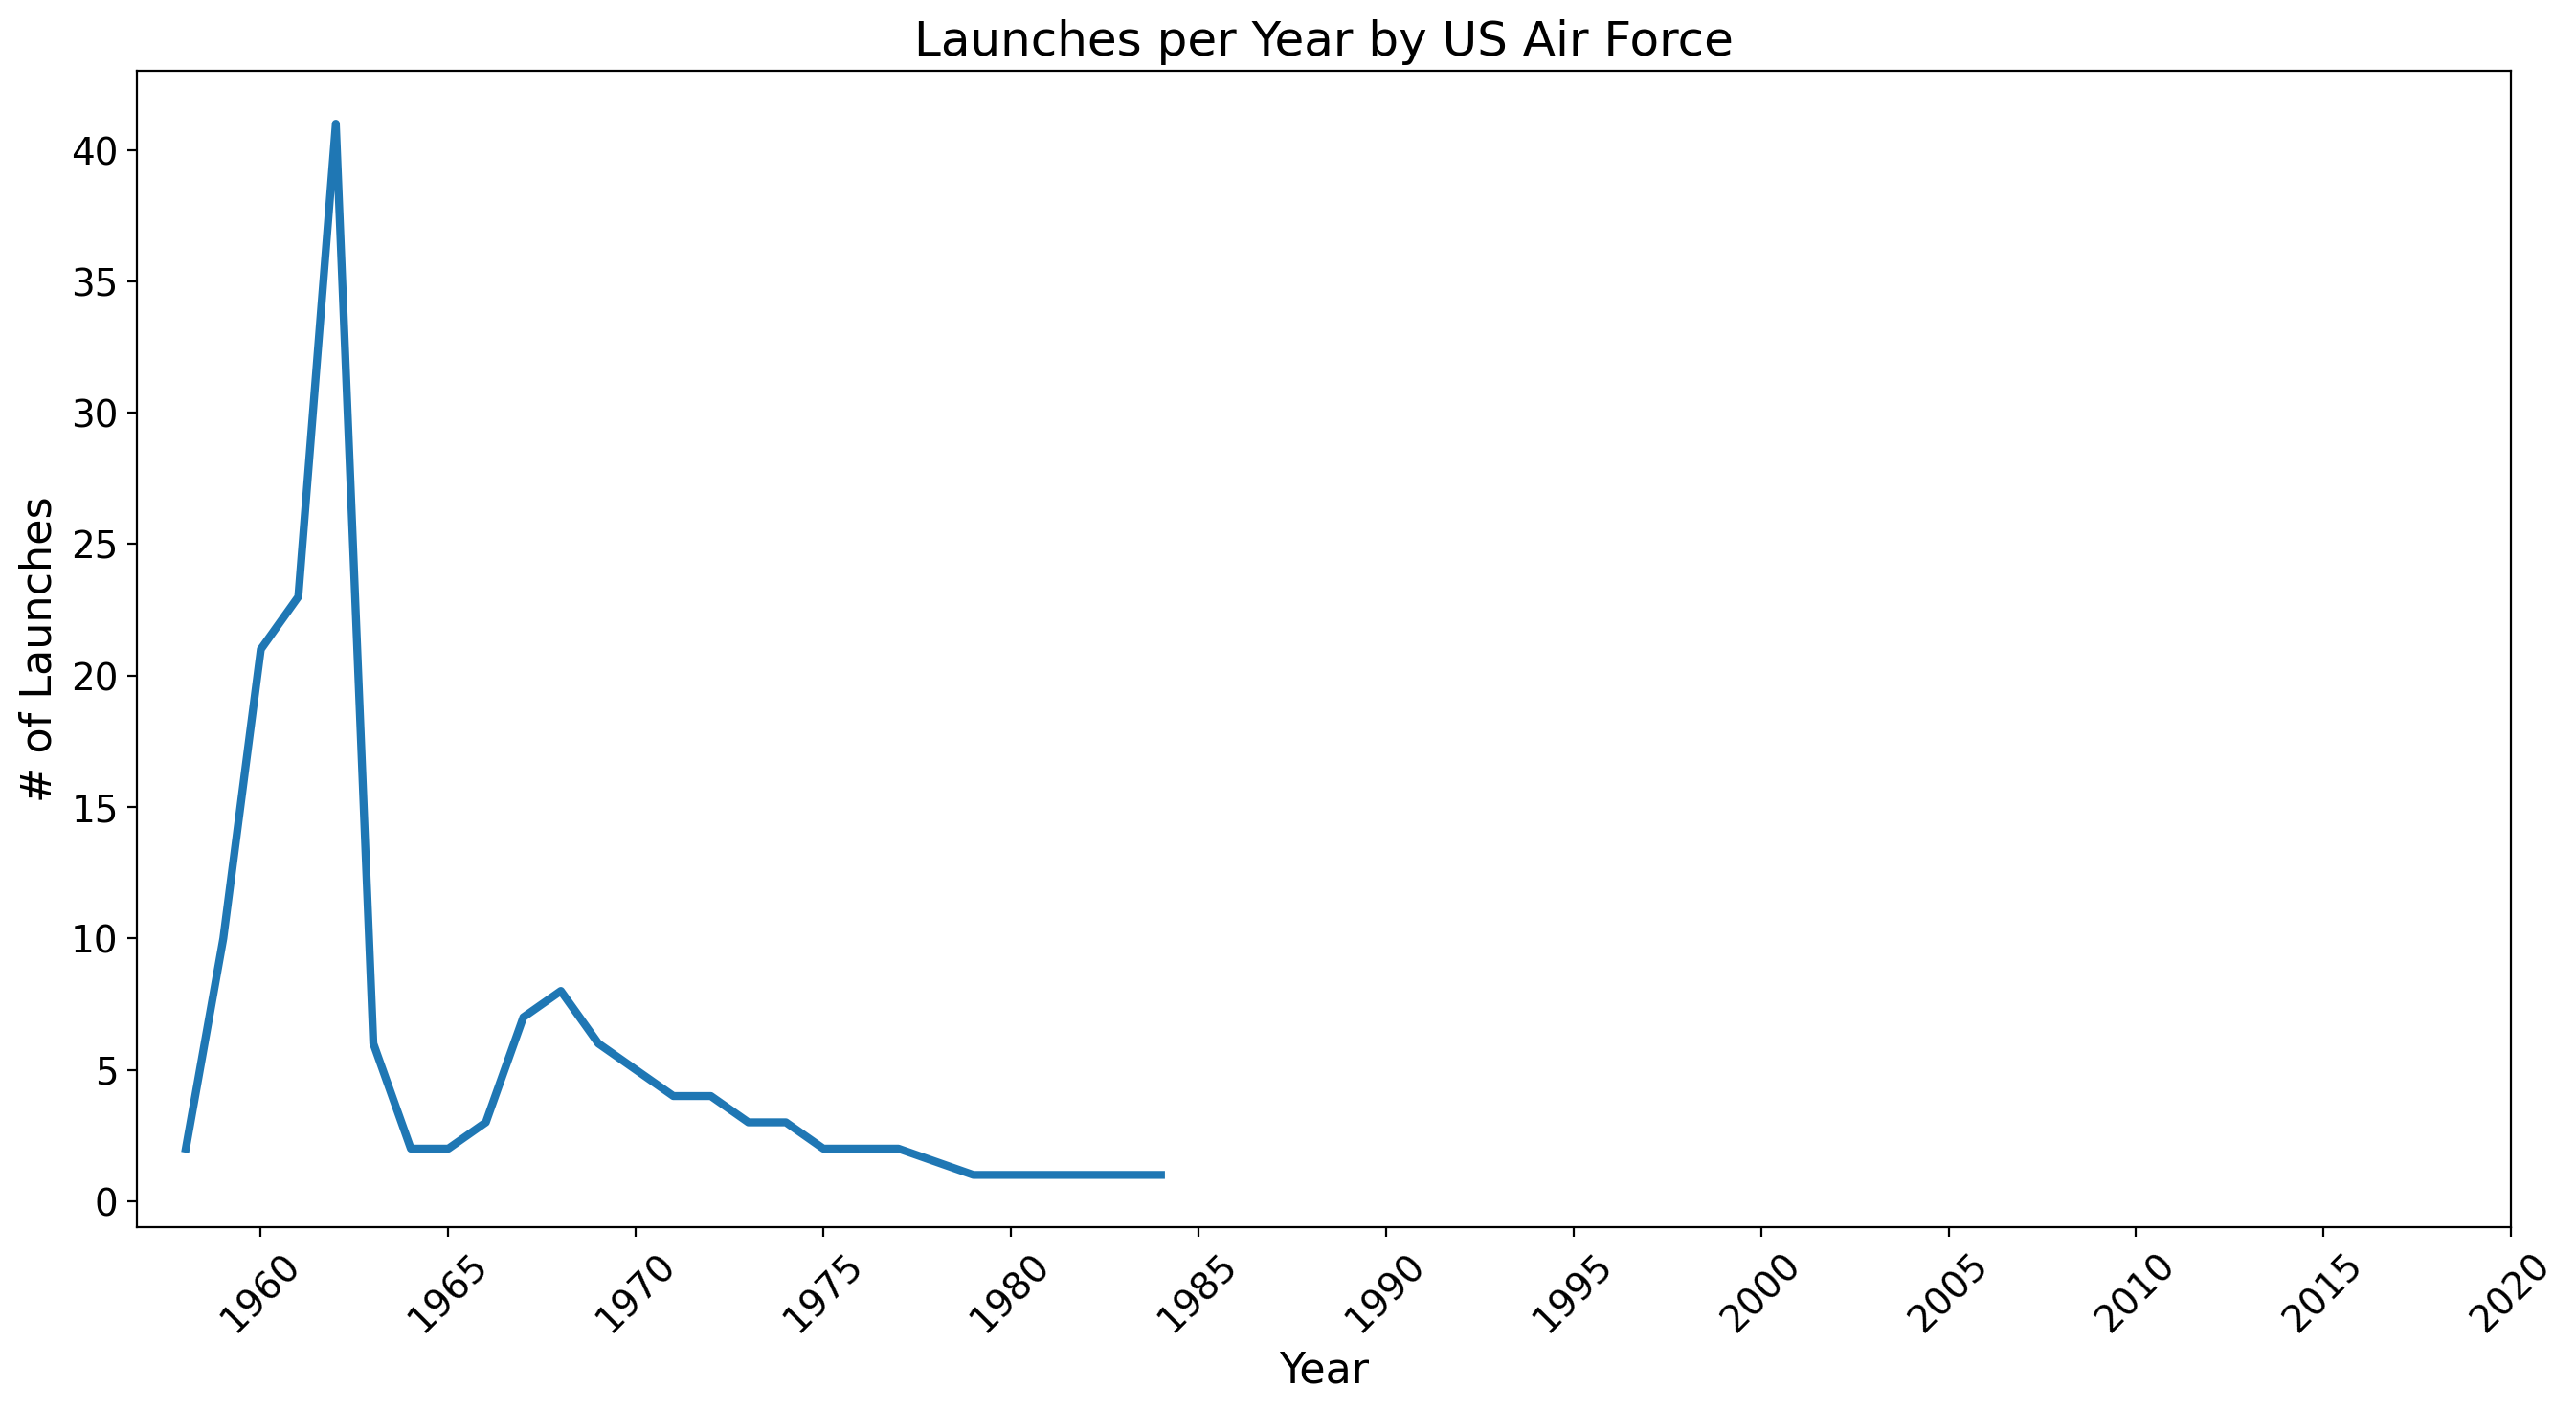

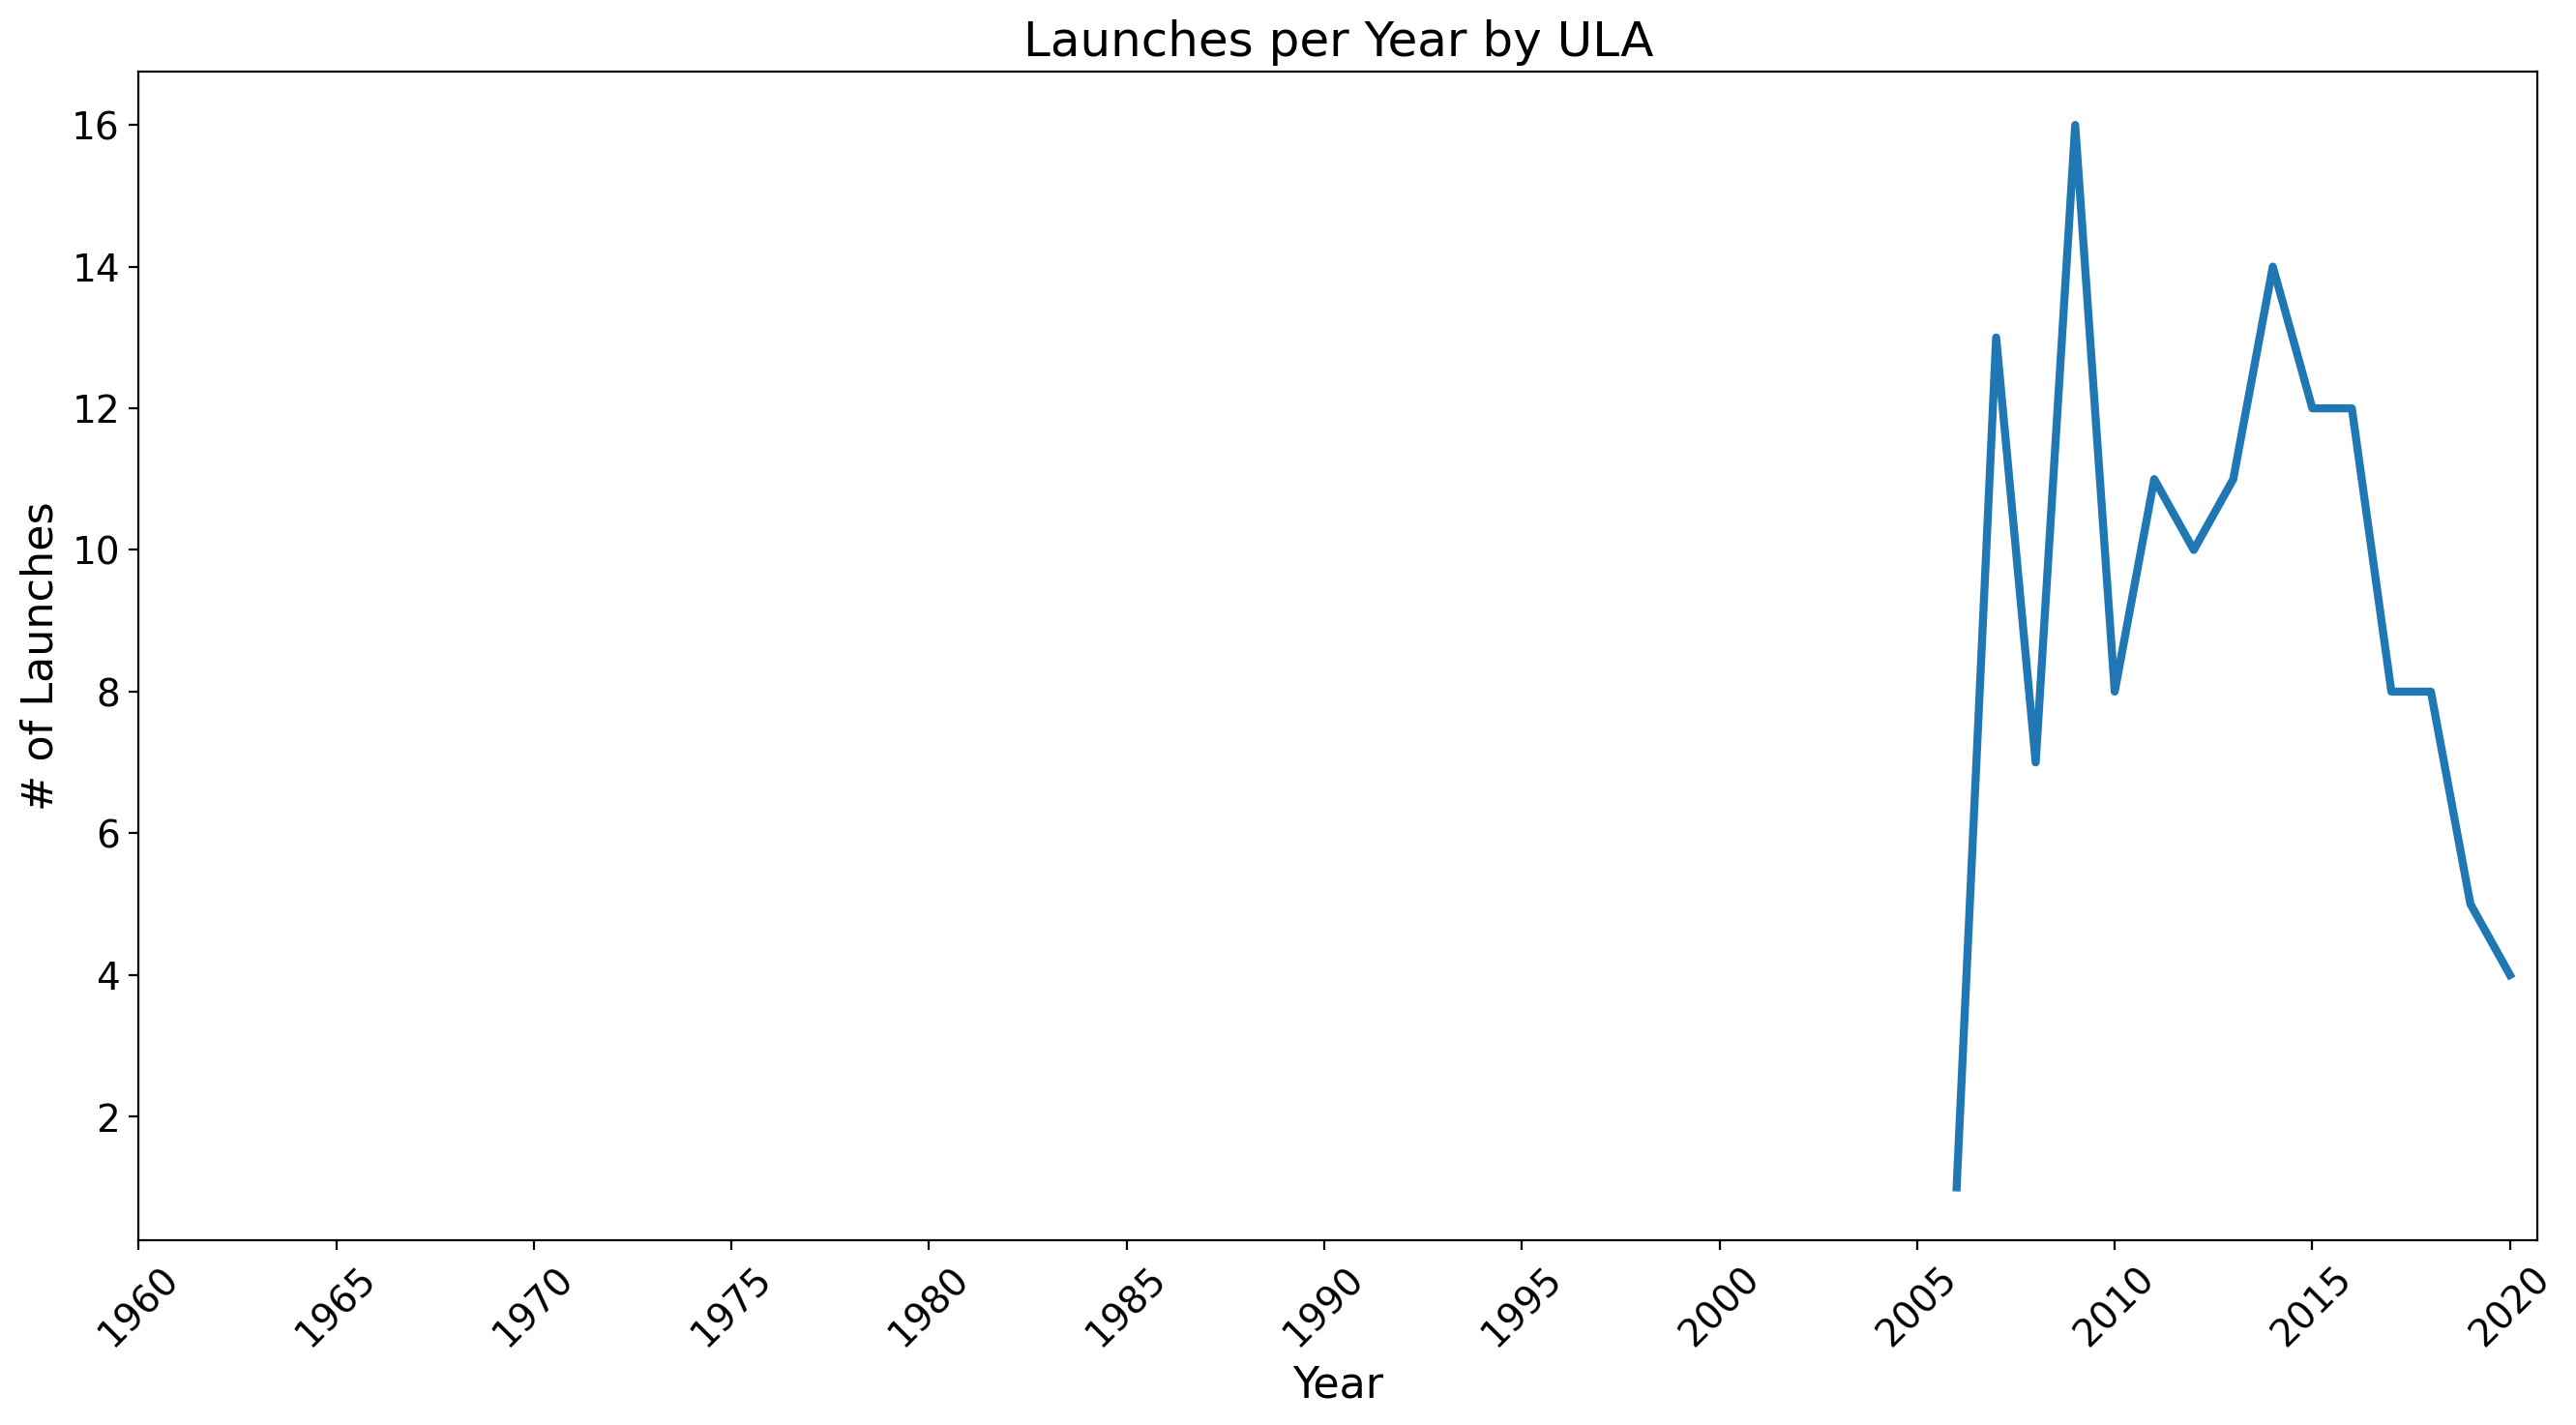

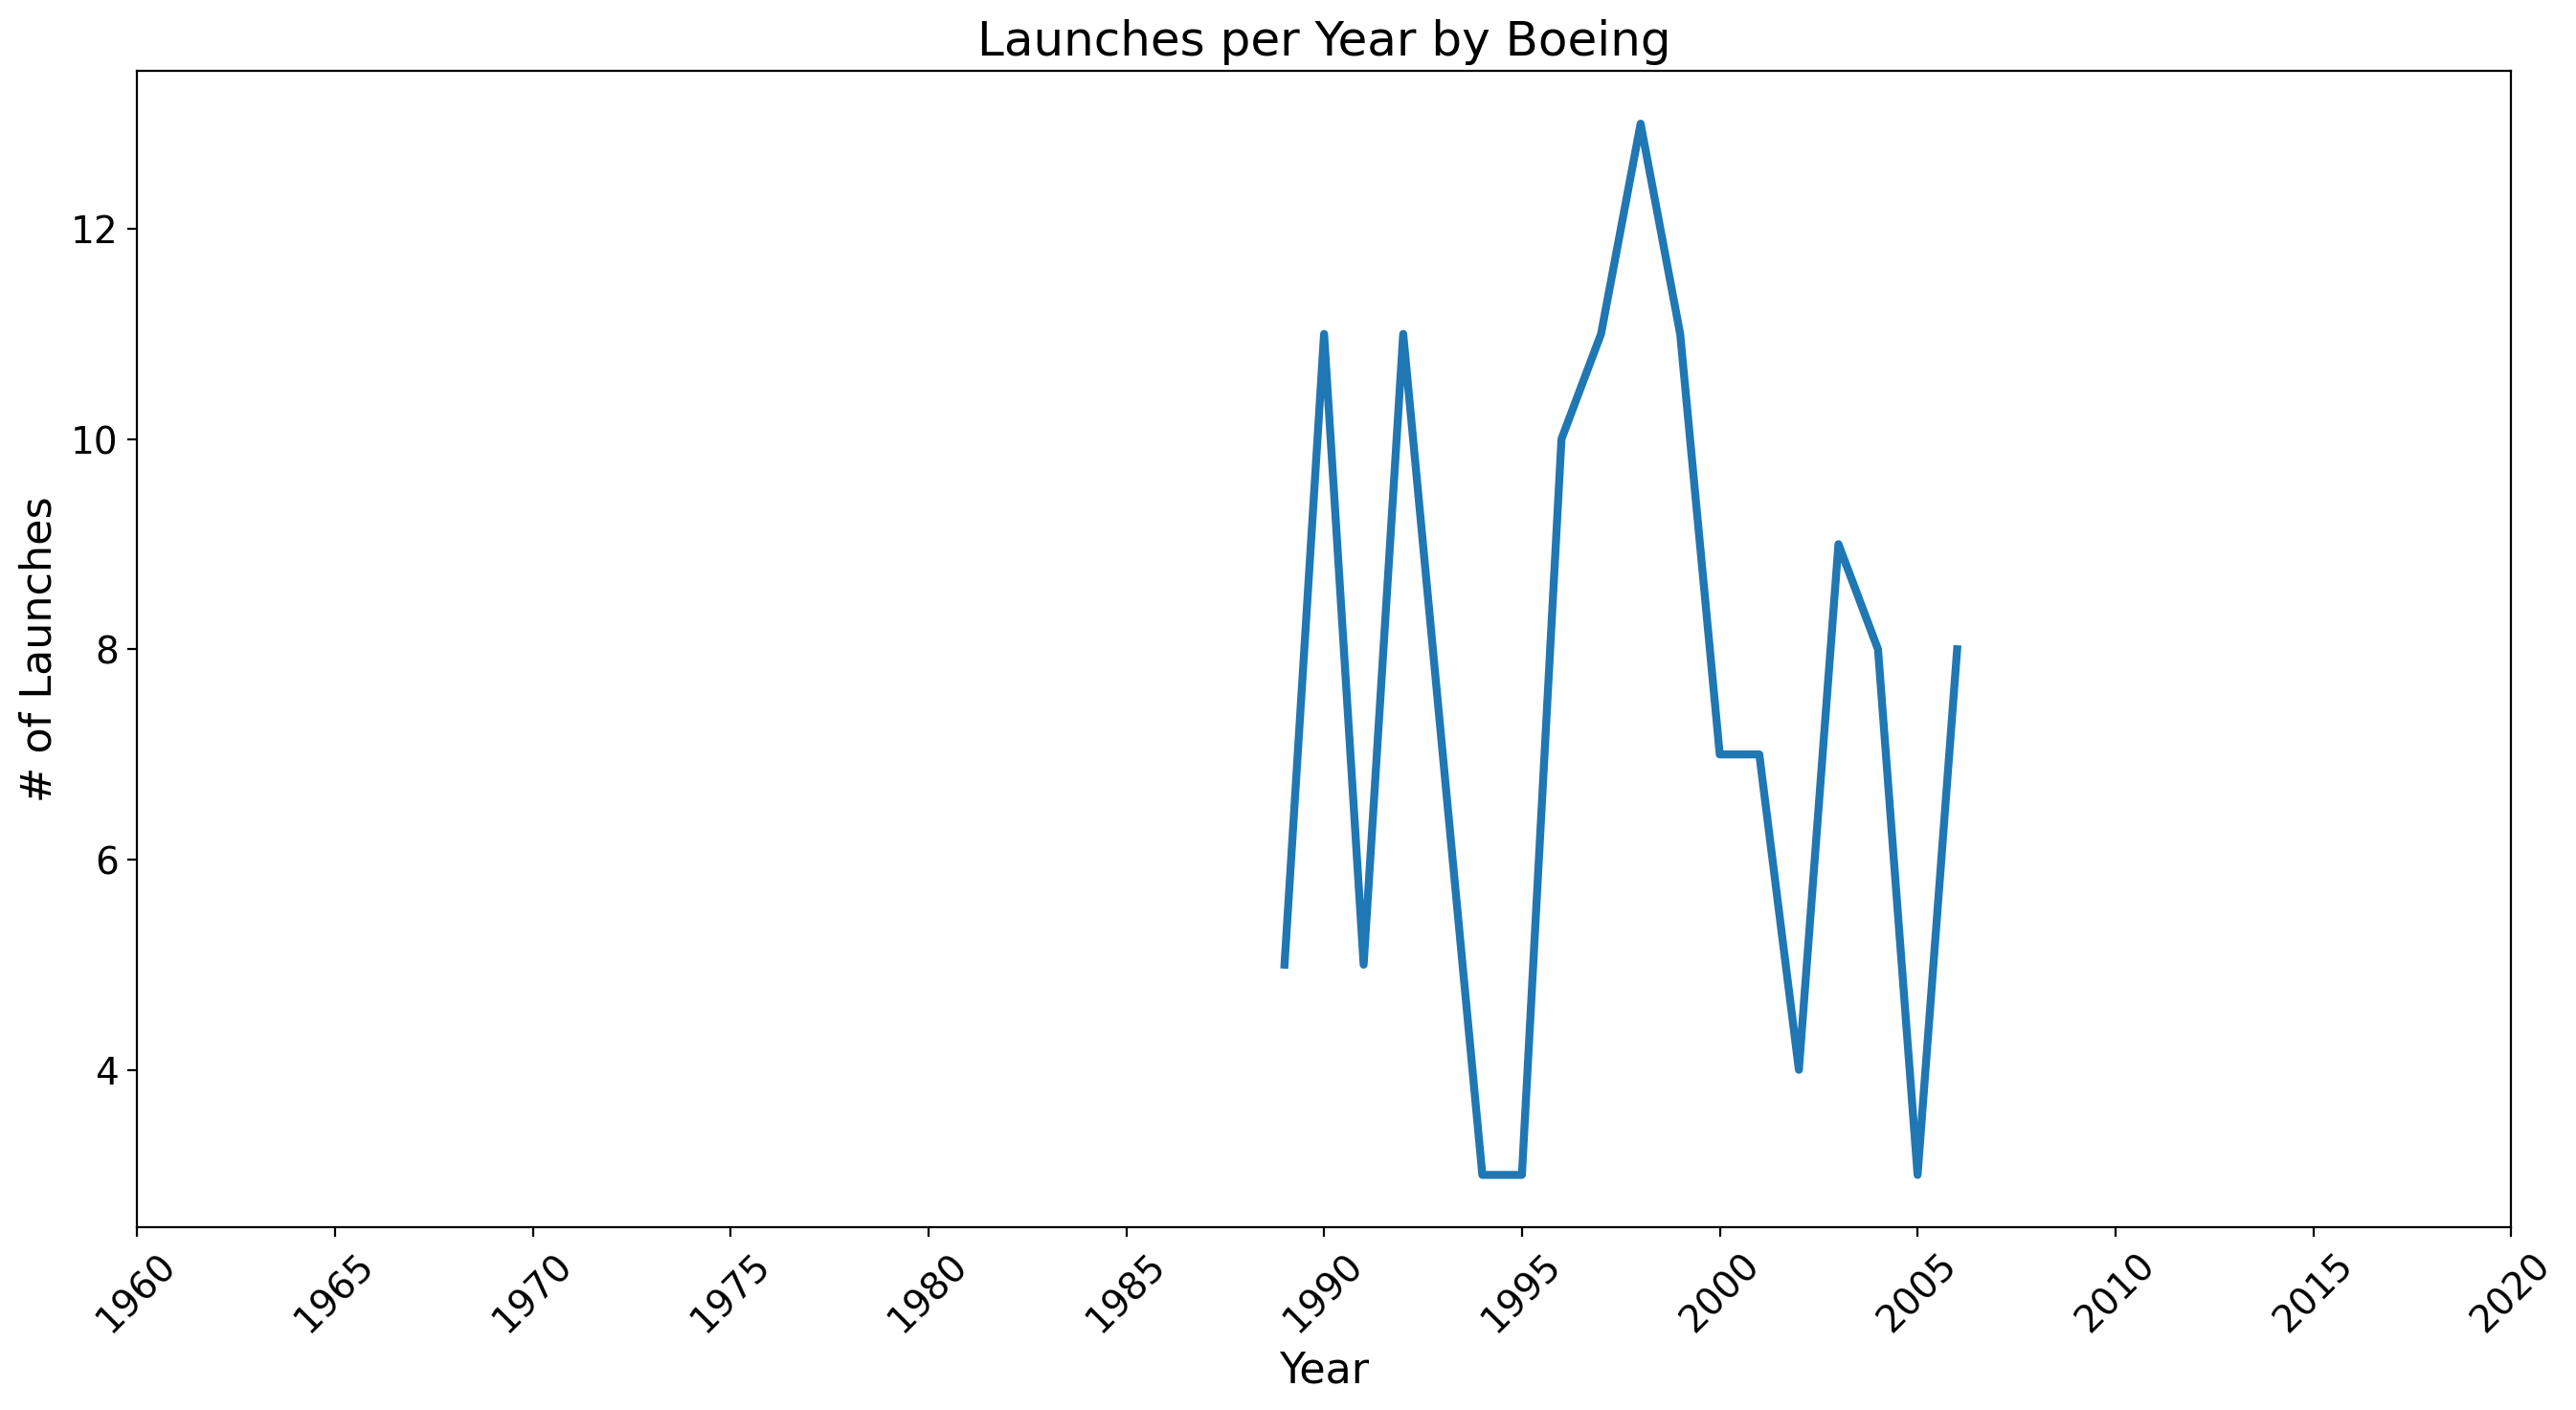

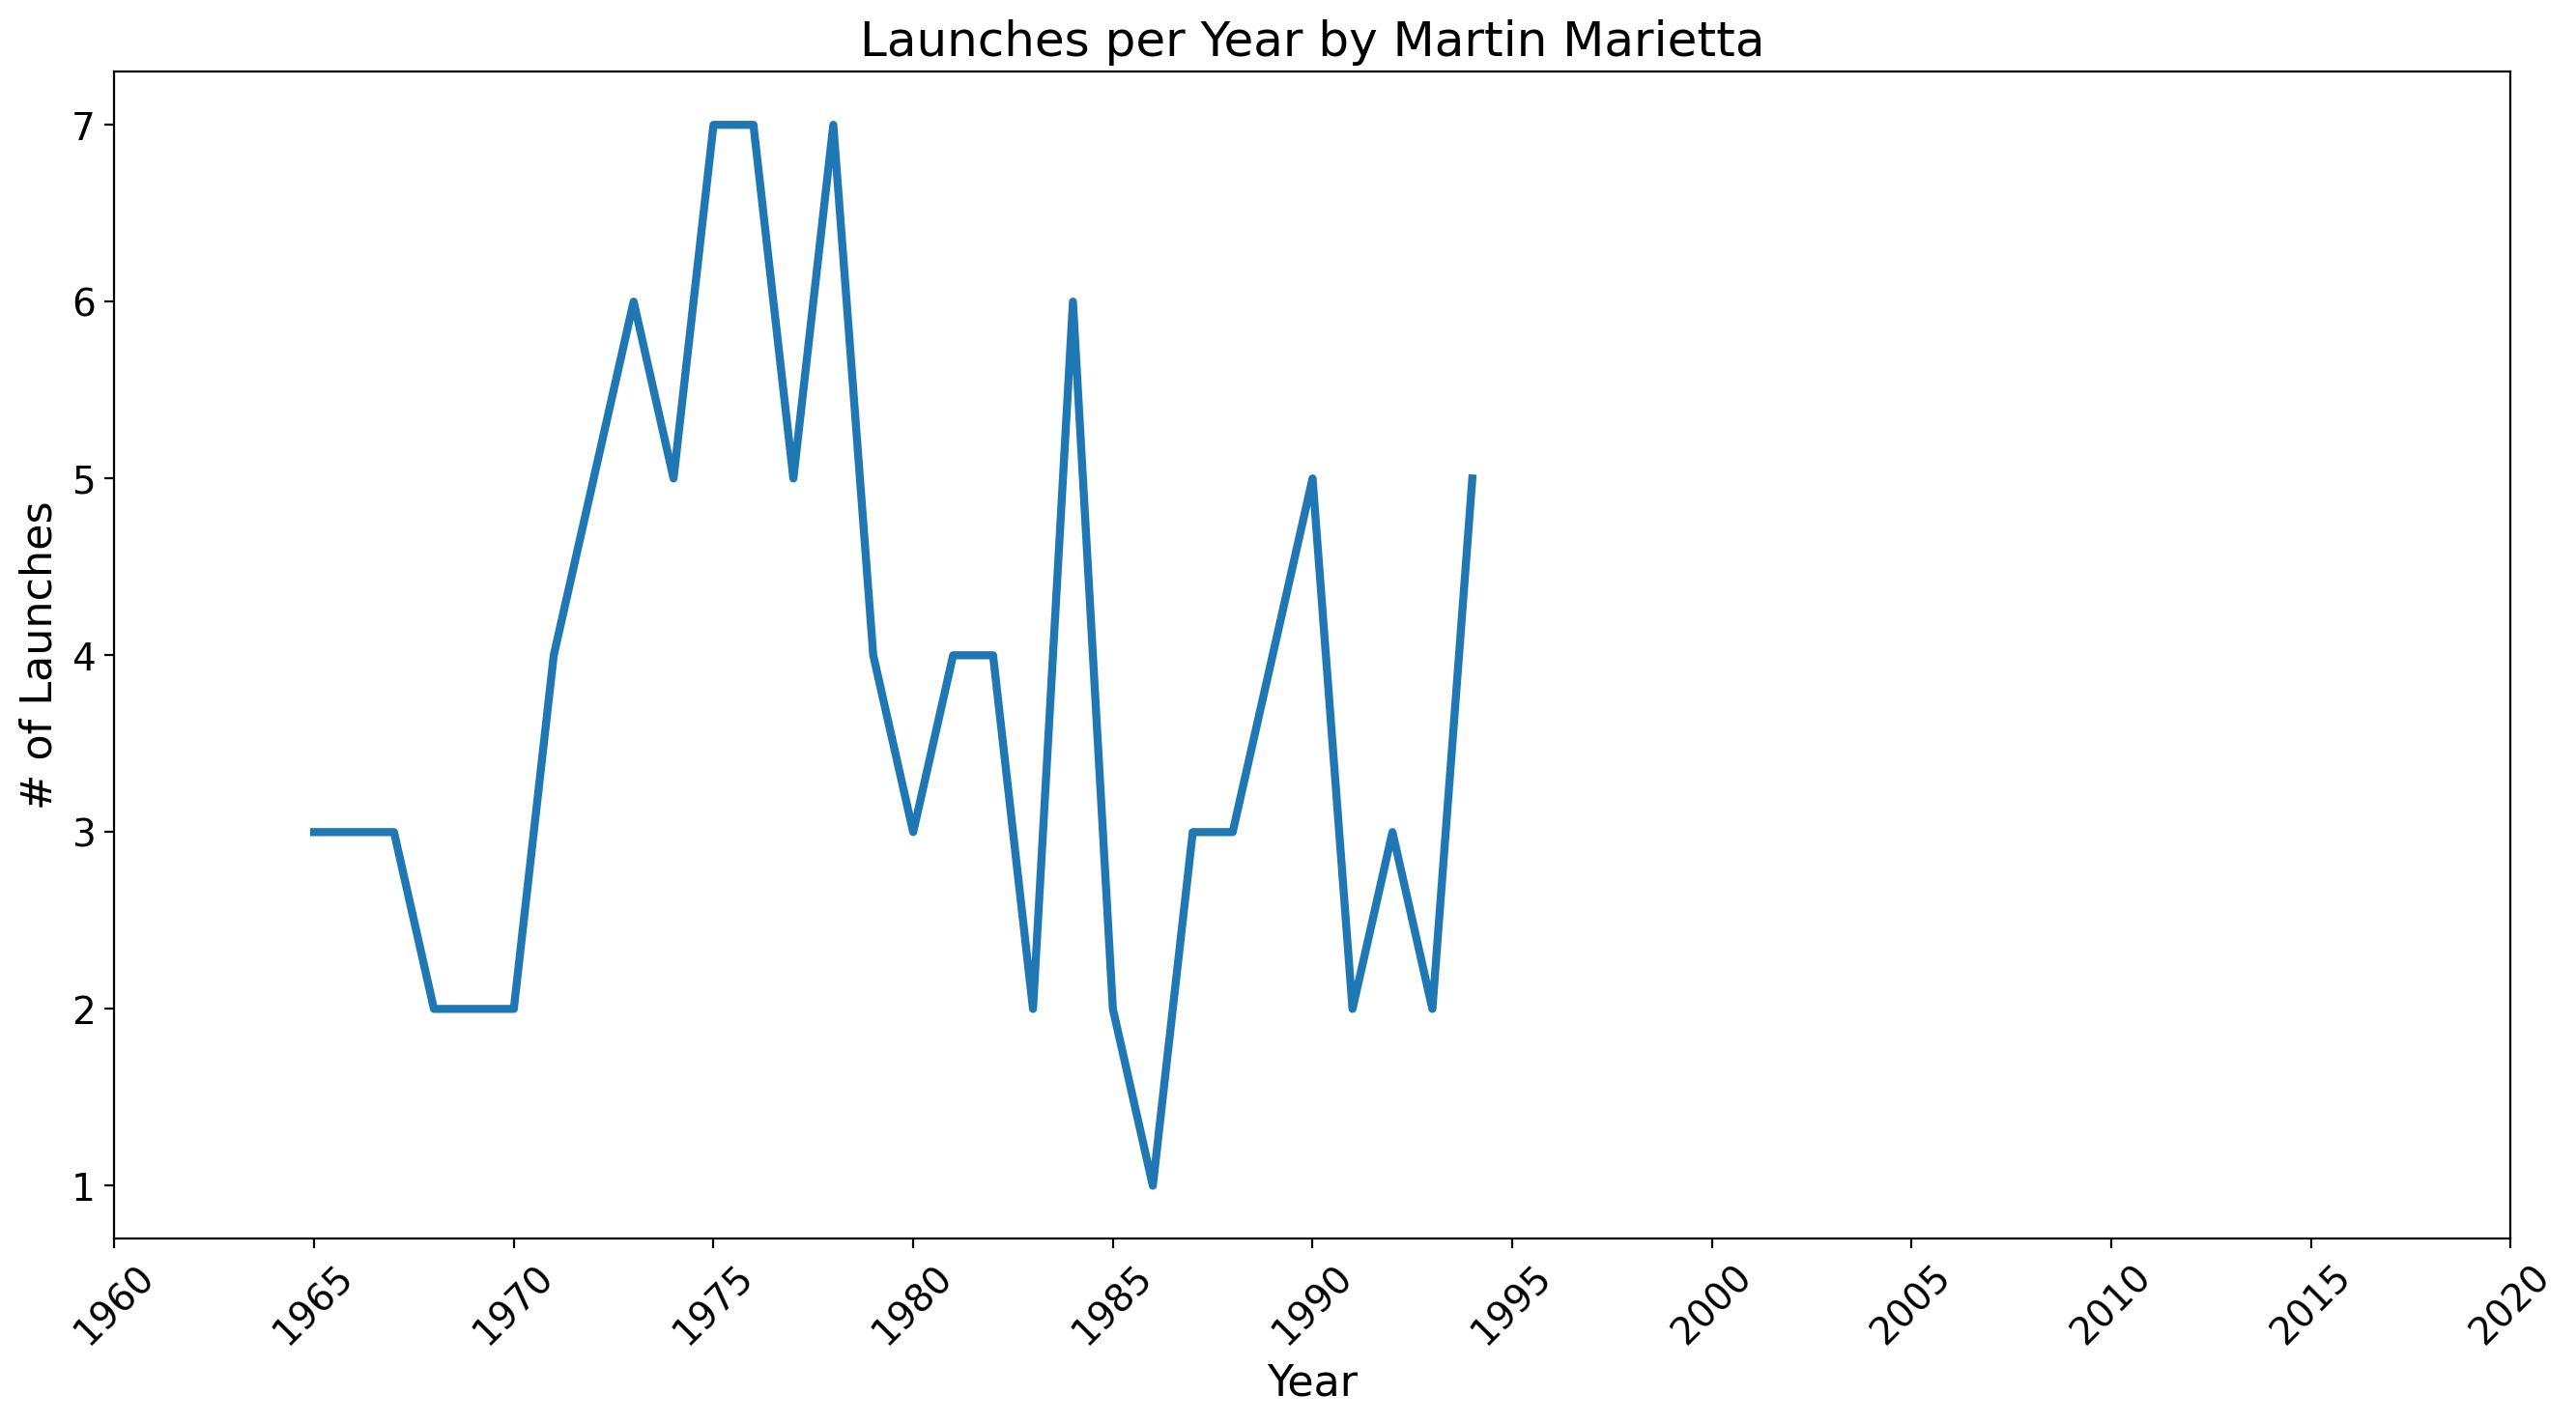

In [87]:
df_org10 = []
for org in org10:
  org_df = df_data[df_data['Organisation'] == org]
  org_df = org_df.groupby(['Year', 'Organisation'], as_index=False).agg({'Mission_Status':pd.Series.count})
  df_org10.append(org_df)
  plt.figure(figsize=(16,8), dpi=200)
  plt.plot(org_df.Year, org_df.Mission_Status, linewidth=3)
  plt.title(f'Launches per Year by {org}', fontsize=18)
  plt.yticks(fontsize=14)
  plt.xticks(ticks=np.arange(1960, 2025, step=5), 
           fontsize=14, 
           rotation=45)
  plt.xlabel('Year', fontsize=16)
  plt.ylabel('# of Launches', fontsize=16)
  plt.show()


In [ ]:
df_org10[1].sample(2)

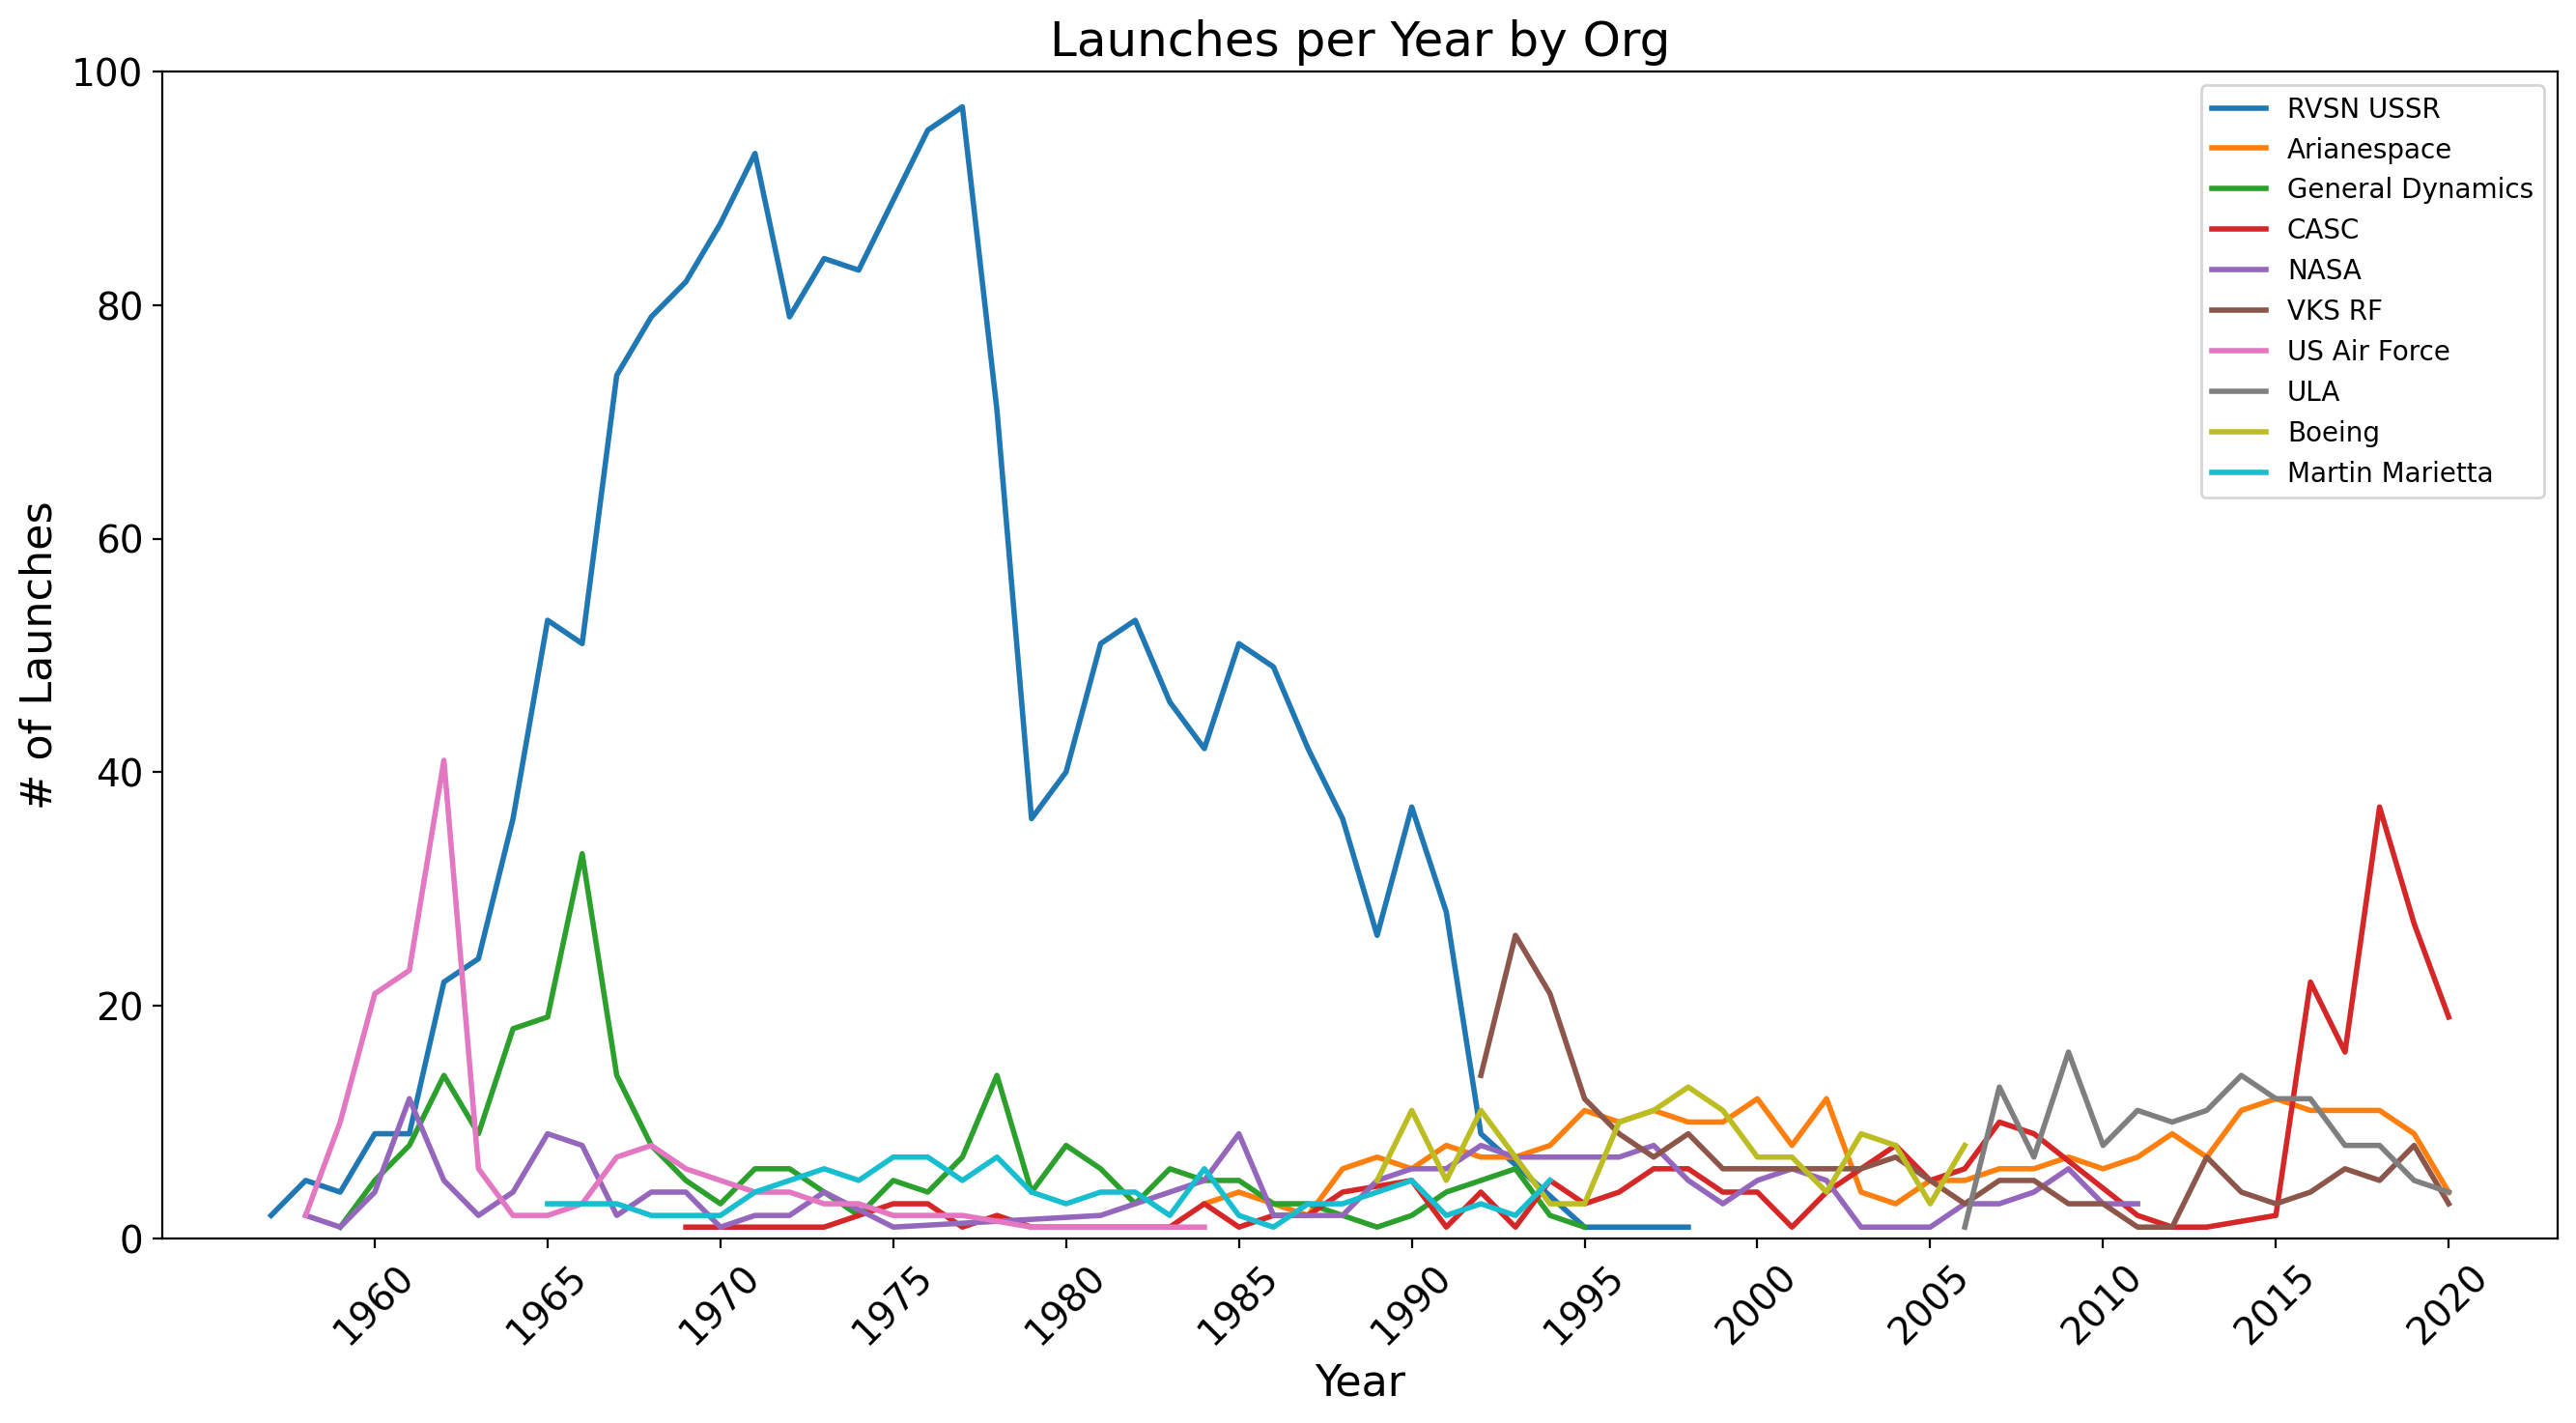

In [89]:
plt.figure(figsize=(16,8), dpi=200)

for org in df_org10:
  plt.plot(org.Year, org.Mission_Status, linewidth=2, label=org.Organisation[1])


plt.title(f'Launches per Year by Org', fontsize=18)
plt.legend()
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1960, 2025, step=5), 
           fontsize=14, 
           rotation=45)
plt.ylim(0, 100)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Launches', fontsize=16)
plt.show()